In [1]:
import pandas as pd
import warnings

pd.set_option('display.max_columns', None)

purchases = pd.read_csv('data/amazon-purchases.csv')
survey = pd.read_csv('data/survey.csv')
dat = pd.merge(purchases, survey, on='Survey ResponseID', how='left')

## Data categorization

In [2]:
# Age categorization
age_categories = {
    '18 - 24 years': 0,
    '25 - 34 years': 1,
    '35 - 44 years': 2,
    '45 - 54 years': 3,
    '55 - 64 years': 4,
    '65 and older': 5
}

dat['Q-demos-age'] = dat['Q-demos-age'].map(age_categories)

dat['Q-demos-age'].value_counts()

Q-demos-age
1    587589
2    569786
3    319992
0    164251
4    153667
5     55432
Name: count, dtype: int64

In [3]:
# Income categorization
income_categories = {
    'Less than $25,000': 0,
    '$25,000 - $49,999': 1,
    '$50,000 - $74,999': 2,
    '$75,000 - $99,999': 3,
    '$100,000 - $149,999': 4,
    '$150,000 or more': 5,
    'Prefer not to say': -1
}

dat['Q-demos-income'] = dat['Q-demos-income'].fillna(-1)
dat['Q-demos-income'] = dat['Q-demos-income'].map(income_categories)

dat = dat[dat['Q-demos-income'] != -1]
dat['Q-demos-income'].value_counts()

Q-demos-income
4    389425
2    369396
1    349313
3    297901
5    250360
0    174370
Name: count, dtype: int64

In [4]:
# Gender categorization
dat['Q-demos-gender'] = dat['Q-demos-gender'].map({'Male': 0, 'Female': 1})

dat = dat.dropna(subset=['Q-demos-gender'])

dat['Q-demos-gender'] = dat['Q-demos-gender'].astype(int)

dat['Q-demos-gender'].value_counts()

Q-demos-gender
1    1062870
0     733500
Name: count, dtype: int64

In [5]:
# Hispanic categorization
dat['Q-demos-hispanic'] = dat['Q-demos-hispanic'].map({'Yes': 1, 'No': 0})

dat['Q-demos-hispanic'].value_counts()

Q-demos-hispanic
0    1629484
1     166886
Name: count, dtype: int64

In [6]:
# Education categorization
education_mapping = {
    "Some high school or less": 0,
    "High school diploma or GED": 1,
    "Bachelor's degree": 2,
    "Graduate or professional degree (MA, MS, MBA, PhD, JD, MD, DDS, etc)": 3,
    "Prefer not to say": -1
}

dat['Q-demos-education'] = dat['Q-demos-education'].map(education_mapping)
dat['Q-demos-education'] = dat['Q-demos-education'].fillna(-1)

dat = dat[dat['Q-demos-education'] != -1]

dat['Q-demos-education'].value_counts()

Q-demos-education
2    814172
1    571241
3    390764
0     11167
Name: count, dtype: int64

In [7]:
# Usage categorization
usage_categories = {
    'Less than 5 times per month': 0,
    '5 - 10 times per month': 1,
    'More than 10 times per month': 2,
}

dat['Q-amazon-use-how-oft'] = dat['Q-amazon-use-how-oft'].map(usage_categories)

dat['Q-amazon-use-how-oft'].value_counts()

Q-amazon-use-how-oft
1    742633
0    672423
2    372288
Name: count, dtype: int64

In [8]:
# Number of People in Household categorization
hh_size_categories = {
    '1 (just me!)': 0,
    '2': 1,
    '3': 2,
    '4+': 3
}

dat['Q-amazon-use-hh-size'] = dat['Q-amazon-use-hh-size'].map(hh_size_categories)
dat['Q-amazon-use-hh-size'] = dat['Q-amazon-use-hh-size'].astype(int)

dat['Q-amazon-use-hh-size'].value_counts()

Q-amazon-use-hh-size
1    576356
3    529541
2    343859
0    337588
Name: count, dtype: int64

In [9]:
# Substance use cigarettes categorization
cigarettes_use_mapping = {
    'Yes': 1,
    'No': 0,
    'I stopped in the recent past': 2
}


dat['Q-substance-use-cigarettes'] = dat['Q-substance-use-cigarettes'].map(cigarettes_use_mapping)

dat = dat[dat['Q-substance-use-cigarettes'] != 'Prefer not to say']
dat = dat.dropna(subset=['Q-substance-use-cigarettes'])

dat['Q-substance-use-cigarettes'] = dat['Q-substance-use-cigarettes'].astype(int)

dat['Q-substance-use-cigarettes'].value_counts()

Q-substance-use-cigarettes
0    1513002
1     226883
2      46145
Name: count, dtype: int64

In [10]:
# Substance use marijuana categorization
marijuana_use_mapping = {
    'Yes': 1,
    'No': 0,
    'I stopped in the recent past': 2
}

dat['Q-substance-use-marijuana'] = dat['Q-substance-use-marijuana'].map(marijuana_use_mapping)
dat = dat[dat['Q-substance-use-marijuana'] != 'Prefer not to say']

dat['Q-substance-use-cigarettes'].value_counts()

Q-substance-use-cigarettes
0    1513002
1     226883
2      46145
Name: count, dtype: int64

In [11]:
# Substance use alcohol categorization
alcohol_use_mapping = {
    'Yes': 1,
    'No': 0,
    'I stopped in the recent past': 2
}

dat['Q-substance-use-alcohol'] = dat['Q-substance-use-alcohol'].map(alcohol_use_mapping)

dat = dat[dat['Q-substance-use-alcohol'] != 'Prefer not to say']
dat = dat.dropna(subset=['Q-substance-use-alcohol'])

dat['Q-substance-use-alcohol'] = dat['Q-substance-use-alcohol'].astype(int)

dat['Q-substance-use-alcohol'].value_counts()

Q-substance-use-alcohol
0    940737
1    792039
2     50250
Name: count, dtype: int64

In [12]:
# Race column categorization
unique_races = [
    'American Indian/Native American or Alaska Native',
    'Asian',
    'Black or African American',
    'Native Hawaiian or Other Pacific Islander',
    'White or Caucasian',
    'Other'
]

for race in unique_races:
    dat[f'Race_{race}'] = dat['Q-demos-race'].apply(lambda x: True if race in str(x) else False)


dat[[f'Race_{race}' for race in unique_races]].head()

,Race_American Indian/Native American or Alaska Native,Race_Asian,Race_Black or African American,Race_Native Hawaiian or Other Pacific Islander,Race_White or Caucasian,Race_Other
0,False,False,True,False,False,False
1,False,False,True,False,False,False
2,False,False,True,False,False,False
3,False,False,True,False,False,False
4,False,False,True,False,False,False


In [13]:
# Sexual orientation categorization
sexual_orientation_mapping = {
    'heterosexual (straight)': 0,
    'LGBTQ+': 1
}

dat['Q-sexual-orientation'] = dat['Q-sexual-orientation'].map(sexual_orientation_mapping)

dat = dat[dat['Q-sexual-orientation'] != 'Prefer not to say']
dat = dat.dropna(subset=['Q-sexual-orientation'])

dat['Q-sexual-orientation'] = dat['Q-sexual-orientation'].astype(int)

dat['Q-sexual-orientation'].value_counts()

Q-sexual-orientation
0    1429234
1     335528
Name: count, dtype: int64

In [14]:
# Personal disability categorization
disability_mapping = {
    'Yes': 1,
    'No': 0
}

dat['Q-personal-diabetes'] = dat['Q-personal-diabetes'].map(disability_mapping)

dat = dat[dat['Q-personal-diabetes'] != 'Prefer not to say']
dat = dat.dropna(subset=['Q-personal-diabetes'])

dat['Q-personal-diabetes'] = dat['Q-personal-diabetes'].astype(int)

dat['Q-personal-diabetes'].value_counts()

Q-personal-diabetes
0    1529217
1     233498
Name: count, dtype: int64

In [15]:
# Personal data selling categorization
sell_your_data_mapping = {
    'No': 0,
    'Yes': 1,
    'Yes if I get part of the profit': 2
}

dat['Q-sell-YOUR-data'] = dat['Q-sell-YOUR-data'].map(sell_your_data_mapping)

dat = dat[dat['Q-sell-YOUR-data'] != "I don't know"]
dat = dat.dropna(subset=['Q-sell-YOUR-data'])
dat['Q-sell-YOUR-data'] = dat['Q-sell-YOUR-data'].astype(int)

dat['Q-sell-YOUR-data'].value_counts()

Q-sell-YOUR-data
2    878767
0    765240
1     68807
Name: count, dtype: int64

In [16]:
#Customer data selling categorization
sell_customer_data_mapping = {
    'No': 0,
    'Yes': 1,
    'Yes if consumers get part of the profit': 2
}

dat['Q-sell-consumer-data'] = dat['Q-sell-consumer-data'].map(sell_customer_data_mapping)

dat = dat[dat['Q-sell-consumer-data'] != "I don't know"]
dat = dat.dropna(subset=['Q-sell-consumer-data'])
dat['Q-sell-consumer-data'] = dat['Q-sell-consumer-data'].astype(int)

dat['Q-sell-consumer-data'].value_counts()

Q-sell-consumer-data
2    842559
0    762218
1     71353
Name: count, dtype: int64

In [17]:
# Wheelchair categorization
wheelchair_mapping = {
    'Yes': 1,
    'No': 0
}

dat['Q-personal-wheelchair'] = dat['Q-personal-wheelchair'].map(wheelchair_mapping)

dat = dat[dat['Q-personal-wheelchair'] != 'Prefer not to say']
dat = dat.dropna(subset=['Q-personal-wheelchair'])
dat['Q-personal-wheelchair'] = dat['Q-personal-wheelchair'].astype(int)

dat['Q-personal-wheelchair'].value_counts()

Q-personal-wheelchair
0    1641762
1      33809
Name: count, dtype: int64

In [18]:
# Life change categorization
life_events = ['Became pregnant', 'Had a child', 'Divorce', 'Lost a job', 'Moved place of residence']

for event in life_events:
    dat[f'LifeChange_{event}'] = dat['Q-life-changes'].apply(
        lambda x: True if pd.notna(x) and event in str(x) else False
    )


dat[[f'LifeChange_{event}' for event in life_events]].head()

,LifeChange_Became pregnant,LifeChange_Had a child,LifeChange_Divorce,LifeChange_Lost a job,LifeChange_Moved place of residence
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False


In [19]:
# Small biz use categorization
small_biz_use_mapping = {
    'No': 0,
    'Yes': 1
}

dat['Q-small-biz-use'] = dat['Q-small-biz-use'].map(small_biz_use_mapping)

dat = dat[dat['Q-small-biz-use'] != "I don't know"]
dat = dat.dropna(subset=['Q-small-biz-use'])
dat['Q-small-biz-use'] = dat['Q-small-biz-use'].astype(int)

dat['Q-small-biz-use'].value_counts()

Q-small-biz-use
0    649734
1    622880
Name: count, dtype: int64

In [20]:
# Census use categorization
census_use_mapping = {
    'No': 0,
    'Yes': 1
}

dat['Q-census-use'] = dat['Q-census-use'].map(census_use_mapping)

dat = dat[dat['Q-census-use'] != "I don't know"]
dat = dat.dropna(subset=['Q-census-use'])
dat['Q-census-use'] = dat['Q-census-use'].astype(int)

dat['Q-census-use'].value_counts()

Q-census-use
0    672218
1    360611
Name: count, dtype: int64

In [21]:
# Research society categorization
research_society_mapping = {
    'No': 0,
    'Yes': 1
}

dat['Q-research-society'] = dat['Q-research-society'].map(research_society_mapping)

dat = dat[dat['Q-research-society'] != "I don't know"]
dat = dat.dropna(subset=['Q-research-society'])
dat['Q-research-society'] = dat['Q-research-society'].astype(int)

dat['Q-research-society'].value_counts()

Q-research-society
1    669725
0    271019
Name: count, dtype: int64

In [22]:
dat.to_csv('data/amazon-purchases-cleaned.csv', index=False)

## Product Category

In [23]:
import pandas as pd

# Read the cleaned dataset
dat = pd.read_csv('data/amazon-purchases-cleaned.csv')

# Filter the dataset to include only orders up to '2022-12-20'
dat = dat[dat['Order Date'] <= '2022-12-20']

# Count the occurrences of each category
category_counts = dat['Category'].value_counts()

# Filter categories that have at least 5000 occurrences
filtered_categories = category_counts[category_counts >= 5000].index

# Keep only the rows with the filtered categories
dat = dat[dat['Category'].isin(filtered_categories)]

# Define a dictionary to map specific product categories to broader categories
product_categories = {
    "Books & Media": [
        "ABIS_BOOK", "PHYSICAL_MOVIE", "PHYSICAL_VIDEO_GAME_SOFTWARE", "DOWNLOADABLE_VIDEO_GAME", "ABIS_MUSIC"
    ],
    "Electronics": [
        "ELECTRONIC_CABLE", "CELLULAR_PHONE_CASE", "HEADPHONES", "SCREEN_PROTECTOR", 
        "CHARGING_ADAPTER", "PORTABLE_ELECTRONIC_DEVICE_COVER", "LIGHT_BULB", "LAMP"
    ],
    "Clothing": [
        "SHIRT", "PANTS", "SOCKS", "UNDERPANTS", "SHORTS", "BRA", "DRESS", "HAT", "SWIMWEAR"
    ],
    "Food & Beverages": [
        "FOOD", "GROCERY", "VEGETABLE", "FRUIT", "COFFEE", "TEA", "DRINK_FLAVORED", 
        "SNACK_FOOD_BAR", "SNACK_CHIP_AND_CRISP", "SUGAR_CANDY", "COOKIE", "BREAKFAST_CEREAL"
    ],
    "Health & Personal Care": [
        "HEALTH_PERSONAL_CARE", "NUTRITIONAL_SUPPLEMENT", "MEDICATION", "VITAMIN", 
        "HERBAL_SUPPLEMENT", "SKIN_MOISTURIZER", "SKIN_CLEANING_AGENT", "SKIN_CLEANING_WIPE", 
        "BEAUTY", "HAIR_STYLING_AGENT"
    ],
    "Home & Kitchen": [
        "CLEANING_AGENT", "LAUNDRY_DETERGENT", "WASTE_BAG", "KITCHEN", "BLANKET"
    ],
    "Pet Supplies": [
        "PET_FOOD", "PET_SUPPLIES", "PET_TOY"
    ],
    "Games & Toys": [
        "TOYS_AND_GAMES", "TOY_FIGURE", "TABLETOP_GAME"
    ],
    "Gifts & Accessories": [
        "GIFT_CARD", "ABIS_GIFT_CARD", "STICKER_DECAL", "WRITING_INSTRUMENT", "ADHESIVE_TAPES"
    ],
    "Miscellaneous": [
        "SAUCE", "DAIRY_BASED_CHEESE", "DRINKING_CUP", "HOME", "OUTDOOR_LIVING"
    ]
}

# Function to map specific product categories to broader categories
def map_to_broad_category(item):
    for category, items in product_categories.items():
        if item in items:
            return category
    return "Other"  

# Apply the mapping function to the 'Category' column to create a new 'ProductCategory' column
dat['ProductCategory'] = dat['Category'].apply(map_to_broad_category)

# Calculate the revenue for each order
dat['Revenue'] = dat['Purchase Price Per Unit'] * dat['Quantity']

In [24]:
from sklearn.preprocessing import LabelEncoder


# List of features to be encoded
features = [
    'Q-demos-age', 'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
    'Q-amazon-use-howmany', 'Q-amazon-use-hh-size', 'Q-amazon-use-how-oft',
    'Q-substance-use-cigarettes', 'Q-substance-use-marijuana',
    'Q-substance-use-alcohol', 'Q-personal-diabetes', 'Q-personal-wheelchair',
    'Q-sell-YOUR-data', 'Q-small-biz-use', 'Q-census-use', 'Q-research-society',
    'Race_American Indian/Native American or Alaska Native', 'Race_Asian',
    'Race_Black or African American',
    'Race_Native Hawaiian or Other Pacific Islander', 'Race_White or Caucasian',
    'Race_Other'
]

# Dictionary to store label encoders
label_encoders = {}

# Loop through each feature and apply label encoding
for col in features:
    le = LabelEncoder()
    dat[col] = le.fit_transform(dat[col].astype(str))  # Transform the feature
    label_encoders[col] = le  # Store the encoder

features = [
    'Q-demos-age', 'Q-demos-income', 'Q-demos-gender', 'Q-sexual-orientation',
    'Q-amazon-use-howmany', 'Q-amazon-use-hh-size', 'Q-amazon-use-how-oft',
    'Q-substance-use-cigarettes', 'Q-substance-use-marijuana',
    'Q-substance-use-alcohol', 'Q-personal-diabetes', 'Q-personal-wheelchair',
    'Q-sell-YOUR-data', 'Q-small-biz-use', 'Q-census-use', 'Q-research-society',
    'Race_American Indian/Native American or Alaska Native', 'Race_Asian',
    'Race_Black or African American',
    'Race_Native Hawaiian or Other Pacific Islander', 'Race_White or Caucasian',
    'Race_Other'
]

label_encoders = {}

for col in features:
    le = LabelEncoder()
    dat[col] = le.fit_transform(dat[col].astype(str)) 
    label_encoders[col] = le 

## Demographic Clustering

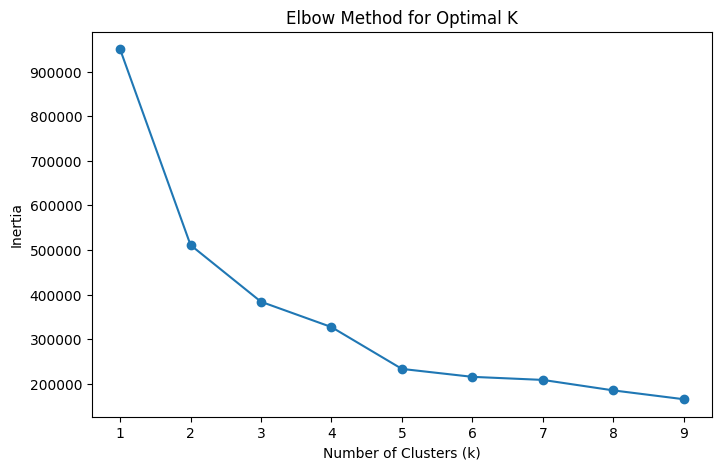

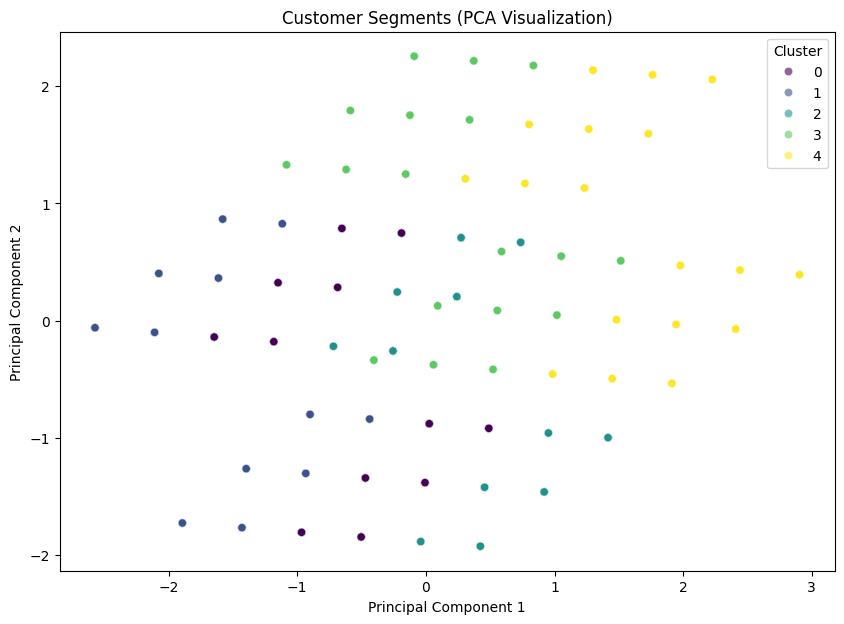

In [25]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

# Define the features to be used for clustering
features = [
    'Q-demos-age', 'Q-demos-income', 'Q-demos-gender'
]

# Extract the features from the dataset
X = dat[features]

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Determine the optimal number of clusters using the Elbow Method
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(8, 5))
plt.plot(range(1, 10), inertia, marker='o')
plt.title("Elbow Method for Optimal K")
plt.xlabel("Number of Clusters (k)")
plt.ylabel("Inertia")
plt.show()

# Perform K-Means clustering with the chosen number of clusters
kmeans = KMeans(n_clusters=5, random_state=42)
dat['Cluster'] = kmeans.fit_predict(X)

# Reduce the dimensionality of the data for visualization using PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Visualize the clustered data using PCA
plt.figure(figsize=(10, 7))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=dat['Cluster'], palette='viridis', alpha=0.6)
plt.title("Customer Segments (PCA Visualization)")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.legend(title="Cluster")

# Save the clustered data to a CSV file and the PCA visualization to an image file
dat.to_csv('data/amazon-purchases-clustered.csv', index=False)
plt.savefig('images/customer_segments.png')
plt.show()

## Finding the cutoff point for the date

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\2550435474.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dat.groupby(pd.Grouper(key='Order Date', freq='M'))


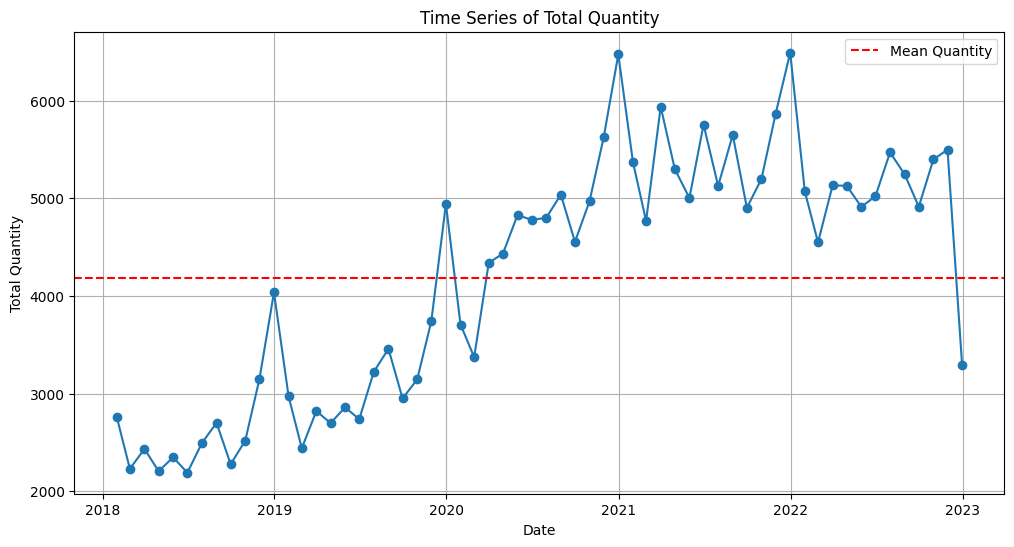

No significant drop-off detected.


In [26]:
# Convert 'Order Date' column to datetime format
dat['Order Date'] = pd.to_datetime(dat['Order Date'])

# Aggregate data by month and sum the 'Quantity' column
aggregated_data = (
    dat.groupby(pd.Grouper(key='Order Date', freq='M'))
       .agg({'Quantity': 'sum'})
       .reset_index()
)

# Plot the time series of total quantity
plt.figure(figsize=(12, 6))
plt.plot(aggregated_data['Order Date'], aggregated_data['Quantity'], marker='o', linestyle='-')
plt.title('Time Series of Total Quantity')
plt.xlabel('Date')
plt.ylabel('Total Quantity')
plt.axhline(y=aggregated_data['Quantity'].mean(), color='red', linestyle='--', label='Mean Quantity')
plt.legend()
plt.grid()
plt.show()

# Define a threshold for significant drop-off
threshold = 0.5  
mean_quantity = aggregated_data['Quantity'].mean()

# Identify data points where quantity is below the threshold
dropoff_data = aggregated_data[aggregated_data['Quantity'] < mean_quantity * threshold]

# Check if there are any drop-off points and print the first occurrence
if not dropoff_data.empty:
    # The first date where drop-off occurs
    cutoff_point = dropoff_data['Order Date'].iloc[0]
    print(f"Significant drop-off starts at: {cutoff_point}")
else:
    print("No significant drop-off detected.")

## Cluster analysis

In [27]:
# Define the demographic features to be used for summarization
demographic_features = [
    'Q-demos-age', 'Q-demos-income', 'Q-demos-gender', 'Race_American Indian/Native American or Alaska Native', 
    'Race_Asian', 'Race_Black or African American', 'Race_Native Hawaiian or Other Pacific Islander', 
    'Race_White or Caucasian', 'Race_Other'
]

# Redefine the demographic features to a smaller subset
demographic_features = [
    'Q-demos-age', 'Q-demos-income', 'Q-demos-gender'
]

# Function to summarize cluster attributes based on given features
def summarize_cluster_attributes(data, cluster_col, features):
    summary = []
    for cluster in data[cluster_col].unique():
        cluster_data = data[data[cluster_col] == cluster]  # Filter data for the current cluster
        cluster_summary = {}
        
        cluster_summary['Cluster'] = cluster  # Store the cluster number
        for feature in features:
            if cluster_data[feature].nunique() <= 10:  # If the feature has 10 or fewer unique values
                cluster_summary[feature] = cluster_data[feature].mode()[0]  # Use the mode (most frequent value)
            else:
                cluster_summary[feature] = round(cluster_data[feature].mean())  # Use the mean value
        
        summary.append(cluster_summary)  # Append the summary for the current cluster
    return pd.DataFrame(summary)  # Return the summary as a DataFrame

# Summarize the cluster attributes using the defined demographic features
cluster_summary = summarize_cluster_attributes(dat, 'Cluster', demographic_features)

# Print the demographics summary by cluster
print("Demographics Summary by Cluster:")
for _, row in cluster_summary.iterrows():
    print(f"\nCluster {row['Cluster']} Demographics:")
    for feature in demographic_features:
        print(f"{feature}: {row[feature]}")

Demographics Summary by Cluster:

Cluster 1 Demographics:
Q-demos-age: 1
Q-demos-income: 1
Q-demos-gender: 1

Cluster 4 Demographics:
Q-demos-age: 3
Q-demos-income: 4
Q-demos-gender: 1

Cluster 3 Demographics:
Q-demos-age: 3
Q-demos-income: 2
Q-demos-gender: 1

Cluster 0 Demographics:
Q-demos-age: 2
Q-demos-income: 2
Q-demos-gender: 0

Cluster 2 Demographics:
Q-demos-age: 2
Q-demos-income: 4
Q-demos-gender: 0


In [28]:
# Group the data by 'Cluster' and aggregate the 'Revenue' and 'Quantity' columns
cluster_spending = (
    dat.groupby('Cluster')
       .agg({'Revenue': 'sum', 'Quantity': 'sum'})
       .reset_index()
)

# Sort the aggregated data by 'Revenue' in ascending order
cluster_spending = cluster_spending.sort_values(by='Revenue', ascending=True)

# Print the sorted cluster spending summary
print("Cluster Spending Summary (Sorted by Least Spending):")
print(cluster_spending)

# Get the cluster with the least spending
least_spending_cluster = cluster_spending.iloc[0]

# Print details of the least spending cluster
print(f"\nLeast Spending Cluster: {least_spending_cluster['Cluster']}")
print(f"Total Revenue: {least_spending_cluster['Revenue']}")
print(f"Total Quantity: {least_spending_cluster['Quantity']}")

Cluster Spending Summary (Sorted by Least Spending):
   Cluster     Revenue  Quantity
3        3   553070.59   34214.0
4        4   817035.59   44247.0
1        1   821717.54   47682.0
0        0  1100817.09   63420.0
2        2  1140648.32   61696.0

Least Spending Cluster: 3.0
Total Revenue: 553070.59
Total Quantity: 34214.0


## Modeling (Prophet)

Forecasting for Category: Health & Personal Care...


23:17:51 - cmdstanpy - INFO - Chain [1] start processing
23:17:51 - cmdstanpy - INFO - Chain [1] done processing


Category Health & Personal Care - MAE: 269.07, MSE: 95703.81


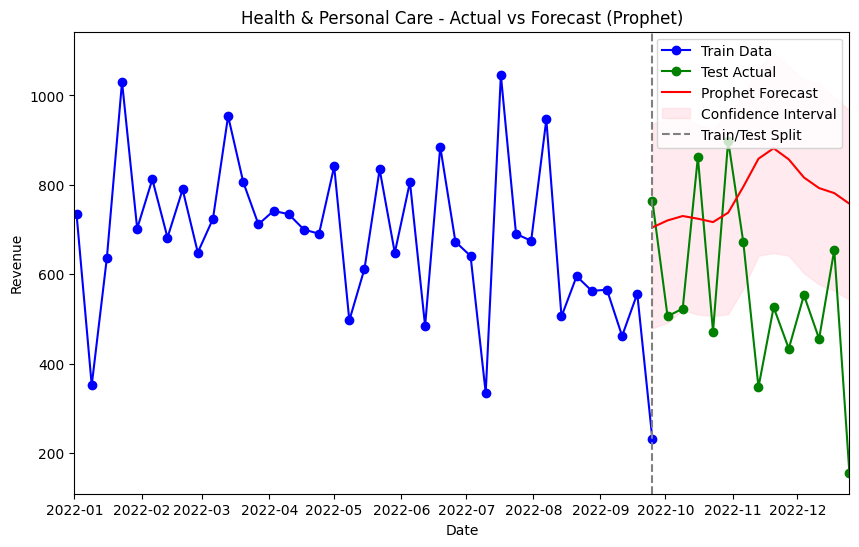

In [29]:
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Ensure 'Order Date' column is in datetime format
dat['Order Date'] = pd.to_datetime(dat['Order Date'])

# Define target categories and filter data for the specified category and cluster
target_categories = ['Health & Personal Care']
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-09-20'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) & 
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Revenue' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Revenue'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to forecast revenue for a given category using Prophet
def forecast_category(train_df, test_df, category):
    print(f"Forecasting for Category: {category}...")
    
    # Rename columns to fit Prophet's expected input format
    train_cat = train_df[train_df['ProductCategory'] == category].rename(columns={'Order Date': 'ds', 'Revenue': 'y'})
    test_cat = test_df[test_df['ProductCategory'] == category].rename(columns={'Order Date': 'ds', 'Revenue': 'y'})
    
    # Check if there is enough data to perform forecasting
    if len(train_cat) < 2 or len(test_cat) < 1:
        print(f"Not enough data to forecast for Category: {category}. Skipping...")
        return None
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train_cat)
    
    # Create a DataFrame for future dates to predict
    future = pd.DataFrame({'ds': test_cat['ds']})
    forecast = model.predict(future)
    
    # Calculate error metrics
    mae = mean_absolute_error(test_cat['y'], forecast['yhat'])
    mse = mean_squared_error(test_cat['y'], forecast['yhat'])
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    train_cat = train_cat[train_cat['ds'] >= '2022-01-01']
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], test_cat['y'], 'go-', label='Test Actual')
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Prophet Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                     color='pink', alpha=0.3, label='Confidence Interval')
    plt.axvline(x=train_cat['ds'].max(), color='gray', linestyle='--', label='Train/Test Split')
    plt.title(f'{category} - Actual vs Forecast (Prophet)')
    plt.xlabel('Date')
    plt.ylabel('Revenue')
    plt.xlim(pd.Timestamp('2022-01-01'), test_cat['ds'].max())
    plt.legend()
    plt.show()
    
    return {'mae': mae, 'mse': mse, 'forecast': forecast}

# Dictionary to store performance metrics for each category
category_performance = {}
for category in target_categories:
    result = forecast_category(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

Forecasting for Category: Health & Personal Care...


23:17:52 - cmdstanpy - INFO - Chain [1] start processing
23:17:52 - cmdstanpy - INFO - Chain [1] done processing


Category Health & Personal Care - MAE: 16.91, MSE: 433.28


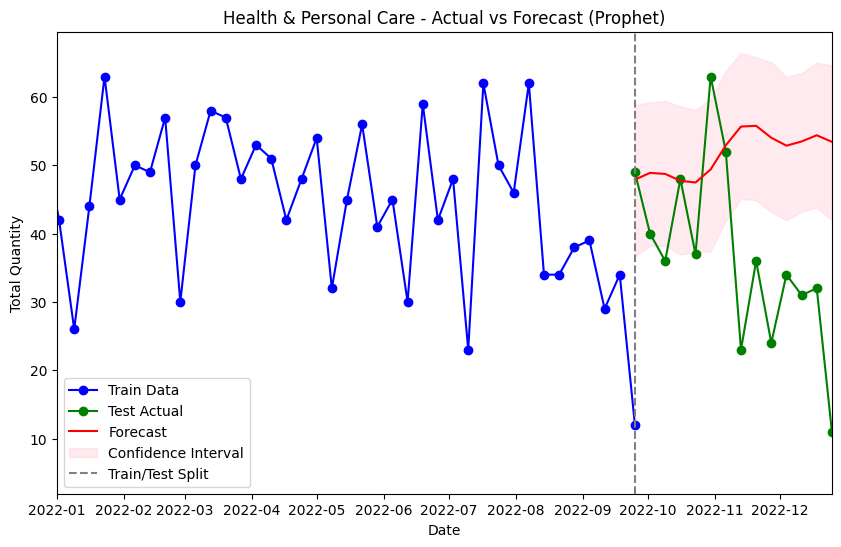

In [30]:
# Filter the data for the specified category and cluster
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-09-20'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) & 
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Quantity' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Quantity'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to forecast quantity for a given category using Prophet
def forecast_category(train_df, test_df, category):
    print(f"Forecasting for Category: {category}...")
    
    # Rename columns to fit Prophet's expected input format
    train_cat = train_df[train_df['ProductCategory'] == category].rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    test_cat = test_df[test_df['ProductCategory'] == category].rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    
    # Check if there is enough data to perform forecasting
    if len(train_cat) < 2 or len(test_cat) < 1:
        print(f"Not enough data to forecast for Category: {category}. Skipping...")
        return None
    
    # Initialize and fit the Prophet model
    model = Prophet()
    model.fit(train_cat)
    
    # Create a DataFrame for future dates to predict
    future = pd.DataFrame({'ds': test_cat['ds']})
    forecast = model.predict(future)
    
    # Calculate error metrics
    mae = mean_absolute_error(test_cat['y'], forecast['yhat'])
    mse = mean_squared_error(test_cat['y'], forecast['yhat'])
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], test_cat['y'], 'go-', label='Test Actual')
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3, label='Confidence Interval')
    
    plt.xlim(pd.Timestamp('2022-01-01'), test_cat['ds'].max())
    plt.axvline(x=train_cat['ds'].max(), color='gray', linestyle='--', label='Train/Test Split')
    plt.title(f'{category} - Actual vs Forecast (Prophet)')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.show()
    
    return {'forecast': forecast, 'mae': mae, 'mse': mse}

# Dictionary to store performance metrics for each category
category_performance = {}
for category in target_categories:
    result = forecast_category(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

## Modeling (XGBoost)

Forecasting for Category: Health & Personal Care...
Category Health & Personal Care - MAE: 15.97, MSE: 344.76


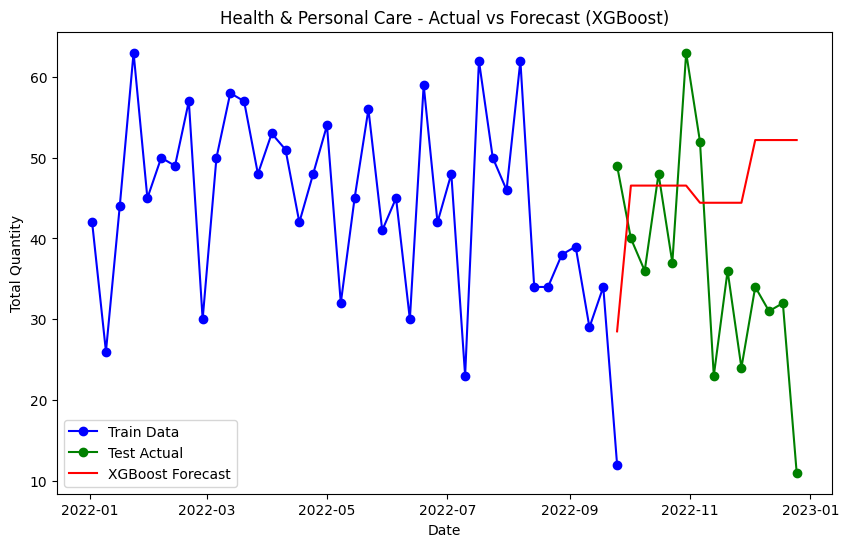

In [31]:
import xgboost as xgb

# Ensure 'Order Date' column is in datetime format
dat['Order Date'] = pd.to_datetime(dat['Order Date'])

# Define target categories and filter data for the specified category and cluster
target_categories = ['Health & Personal Care']
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-09-20'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) & 
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Quantity' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Quantity'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to create features without lag for the given category
def create_features_no_lag(df, category):
    df = df[df['ProductCategory'] == category].copy()
    df = df.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    
    # Extract month and year from the date
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    return df

# Function to forecast quantity for a given category using XGBoost
def forecast_category_xgb(train_df, test_df, category):
    print(f"Forecasting for Category: {category}...")
    
    # Create features for training and testing data
    train_cat = create_features_no_lag(train_df, category)
    test_cat = create_features_no_lag(test_df, category)
    
    # Define the feature set and target variable
    X_train = train_cat[['month', 'year']]
    y_train = train_cat['y']
    X_test = test_cat[['month', 'year']]
    y_test = test_cat['y']
    
    # Initialize and fit the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    train_cat = train_cat[train_cat['ds'] > '2022-01-01']
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], y_test, 'go-', label='Test Actual')
    plt.plot(test_cat['ds'], y_pred, 'r-', label='XGBoost Forecast')
    plt.title(f'{category} - Actual vs Forecast (XGBoost)')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.show()
    
    return {'mae': mae, 'mse': mse, 'predictions': y_pred}

# Dictionary to store performance metrics for each category
category_performance = {}

# Forecast for each target category
for category in target_categories:
    result = forecast_category_xgb(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

Forecasting Revenue for Category: Health & Personal Care...
Category Health & Personal Care - MAE: 238.98, MSE: 86014.10


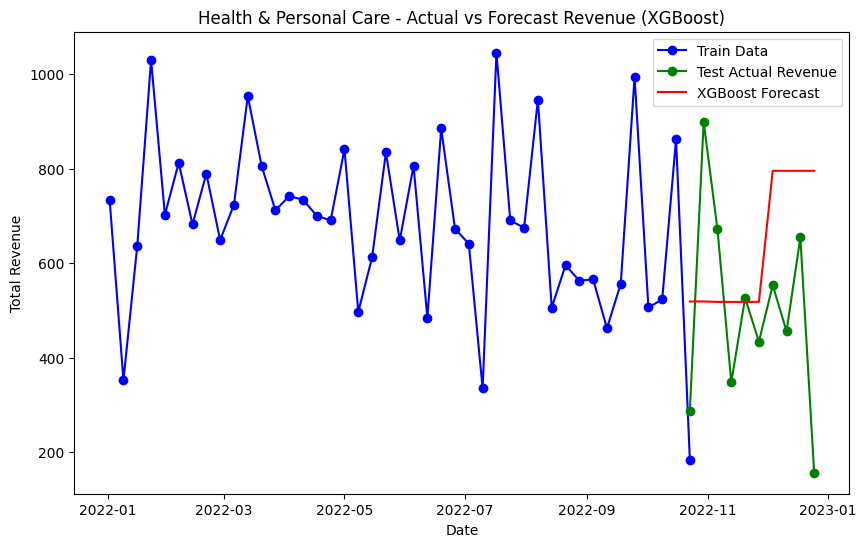

In [32]:
# Convert 'Order Date' column to datetime format
dat['Order Date'] = pd.to_datetime(dat['Order Date'])

# Define target categories and filter data for the specified category and cluster
target_categories = ['Health & Personal Care']
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-10-20'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) & 
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Revenue' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Revenue'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to create features without lag for the given category
def create_features_no_lag(df, category):
    df = df[df['ProductCategory'] == category].copy()  # Filter data for the specified category
    df = df.rename(columns={'Order Date': 'ds', 'Revenue': 'y'})  # Rename columns to fit Prophet's expected input format
    
    # Extract month and year from the date
    df['month'] = df['ds'].dt.month
    df['year'] = df['ds'].dt.year
    return df

# Function to forecast revenue for a given category using XGBoost
def forecast_category_xgb(train_df, test_df, category):
    print(f"Forecasting Revenue for Category: {category}...")
    
    # Create features for training and testing data
    train_cat = create_features_no_lag(train_df, category)
    test_cat = create_features_no_lag(test_df, category)
    
    # Define the feature set and target variable
    X_train = train_cat[['month', 'year']]
    y_train = train_cat['y']
    X_test = test_cat[['month', 'year']]
    y_test = test_cat['y']
    
    # Initialize and fit the XGBoost model
    model = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500, random_state=42)
    model.fit(X_train, y_train)
    
    # Predict the target variable for the test set
    y_pred = model.predict(X_test)
    
    # Calculate error metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    train_cat = train_cat[train_cat['ds'] > '2022-01-01']  # Filter training data for plotting
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], y_test, 'go-', label='Test Actual Revenue')
    plt.plot(test_cat['ds'], y_pred, 'r-', label='XGBoost Forecast')
    plt.title(f'{category} - Actual vs Forecast Revenue (XGBoost)')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.show()
    
    return {'mae': mae, 'mse': mse, 'predictions': y_pred}

# Dictionary to store performance metrics for each category
category_performance = {}

# Forecast for each target category
for category in target_categories:
    result = forecast_category_xgb(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

## Modeling (Exponential Smoothing)

Forecasting for Category: Health & Personal Care...
Category Health & Personal Care - MAE: 15.11, MSE: 309.41


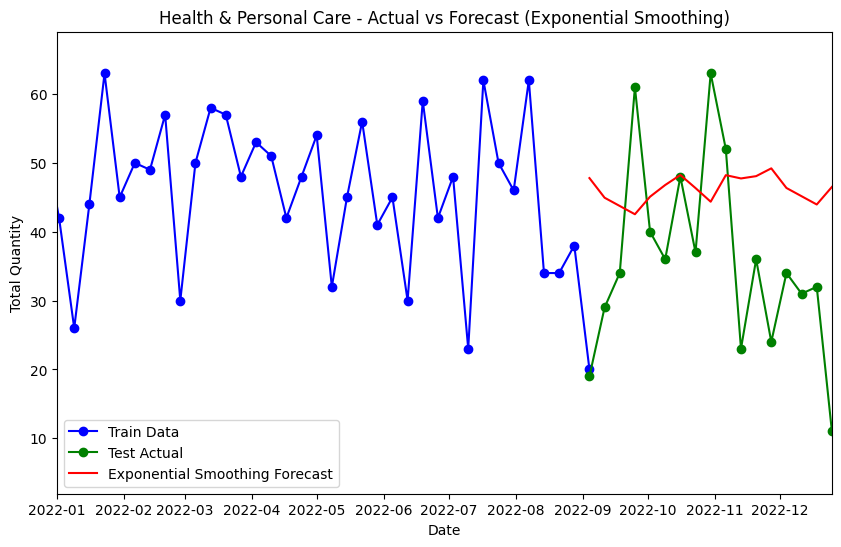

In [33]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Convert 'Order Date' column to datetime format
dat['Order Date'] = pd.to_datetime(dat['Order Date'])

# Define target categories and filter data for the specified category and cluster
target_categories = ['Health & Personal Care']
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-09-01'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) &
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Quantity' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Quantity'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to forecast quantity for a given category using Exponential Smoothing
def forecast_category_es(train_df, test_df, category):
    print(f"Forecasting for Category: {category}...")
    
    # Filter data for the specified category
    train_cat = train_df[train_df['ProductCategory'] == category].copy()
    test_cat = test_df[test_df['ProductCategory'] == category].copy()
    
    # Rename columns to fit the expected input format
    train_cat = train_cat.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    test_cat = test_cat.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    
    # Check if there is enough data to perform forecasting
    if len(train_cat) < 2:
        print(f"Not enough data to forecast for Category: {category}. Skipping...")
        return None
    
    # Initialize and fit the Exponential Smoothing model
    model = ExponentialSmoothing(train_cat['y'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()
    
    # Forecast the quantity for the test period
    forecast_length = len(test_cat)
    forecast = model_fit.forecast(steps=forecast_length)
    
    # Calculate error metrics
    mae = mean_absolute_error(test_cat['y'], forecast)
    mse = mean_squared_error(test_cat['y'], forecast)
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], test_cat['y'], 'go-', label='Test Actual')
    plt.plot(test_cat['ds'], forecast, 'r-', label='Exponential Smoothing Forecast')
    
    # Set plot limits and labels
    plt.xlim(pd.Timestamp('2022-01-01'), test_cat['ds'].max())
    plt.title(f'{category} - Actual vs Forecast (Exponential Smoothing)')
    plt.xlabel('Date')
    plt.ylabel('Total Quantity')
    plt.legend()
    plt.show()
    
    return {'mae': mae, 'mse': mse, 'predictions': forecast}

# Dictionary to store performance metrics for each category
category_performance = {}
for category in target_categories:
    result = forecast_category_es(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

Forecasting for Category: Health & Personal Care...
Category Health & Personal Care - MAE: 202.78, MSE: 58800.16


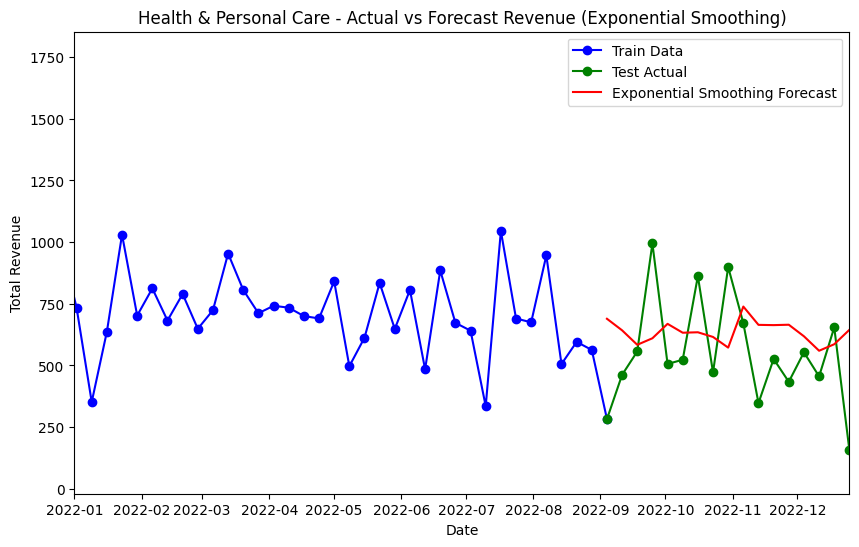

In [34]:
# Define the target categories and filter the data for the specified category and cluster
target_categories = ['Health & Personal Care']
filtered_data = dat[(dat['ProductCategory'].isin(target_categories)) & (dat['Cluster'] == 3)]

# Define the start and end dates for the test data
test_start_date = '2022-09-01'
test_end_date = '2022-12-20'

# Split the data into training and testing sets based on the defined dates
train_data = filtered_data[filtered_data['Order Date'] < test_start_date]
test_data = filtered_data[(filtered_data['Order Date'] >= test_start_date) &
                          (filtered_data['Order Date'] <= test_end_date)]

# Function to aggregate data by week and sum the 'Revenue' column
def aggregate_data(df):
    return df.groupby([pd.Grouper(key='Order Date', freq='W'), 'ProductCategory'])['Revenue'].sum().reset_index()

# Aggregate the training and testing data
train_grouped = aggregate_data(train_data)
test_grouped = aggregate_data(test_data)

# Function to forecast revenue for a given category using Exponential Smoothing
def forecast_category_es(train_df, test_df, category):
    print(f"Forecasting for Category: {category}...")
    
    # Filter data for the specified category
    train_cat = train_df[train_df['ProductCategory'] == category].copy()
    test_cat = test_df[test_df['ProductCategory'] == category].copy()
    
    # Rename columns to fit the expected input format
    train_cat = train_cat.rename(columns={'Order Date': 'ds', 'Revenue': 'y'})
    test_cat = test_cat.rename(columns={'Order Date': 'ds', 'Revenue': 'y'})
    
    # Check if there is enough data to perform forecasting
    if len(train_cat) < 2:
        print(f"Not enough data to forecast for Category: {category}. Skipping...")
        return None
    
    # Initialize and fit the Exponential Smoothing model
    model = ExponentialSmoothing(train_cat['y'], trend='add', seasonal='add', seasonal_periods=12)
    model_fit = model.fit()
    
    # Forecast the revenue for the test period
    forecast_length = len(test_cat)
    forecast = model_fit.forecast(steps=forecast_length)
    
    # Calculate error metrics
    mae = mean_absolute_error(test_cat['y'], forecast)
    mse = mean_squared_error(test_cat['y'], forecast)
    print(f"Category {category} - MAE: {mae:.2f}, MSE: {mse:.2f}")
    
    # Plot the actual vs forecasted values
    plt.figure(figsize=(10, 6))
    plt.plot(train_cat['ds'], train_cat['y'], 'bo-', label='Train Data')
    plt.plot(test_cat['ds'], test_cat['y'], 'go-', label='Test Actual')
    plt.plot(test_cat['ds'], forecast, 'r-', label='Exponential Smoothing Forecast')
    
    # Set plot limits and labels
    plt.xlim(pd.Timestamp('2022-01-01'), test_cat['ds'].max())
    plt.title(f'{category} - Actual vs Forecast Revenue (Exponential Smoothing)')
    plt.xlabel('Date')
    plt.ylabel('Total Revenue')
    plt.legend()
    plt.show()
    
    return {'mae': mae, 'mse': mse, 'predictions': forecast}

# Dictionary to store performance metrics for each category
category_performance = {}
for category in target_categories:
    result = forecast_category_es(train_grouped, test_grouped, category)
    if result is not None:
        category_performance[category] = result

## Plotting the top products by cluster

Plotting Revenue for Product Categories 2-4 - Cluster 1...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\951311243.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])


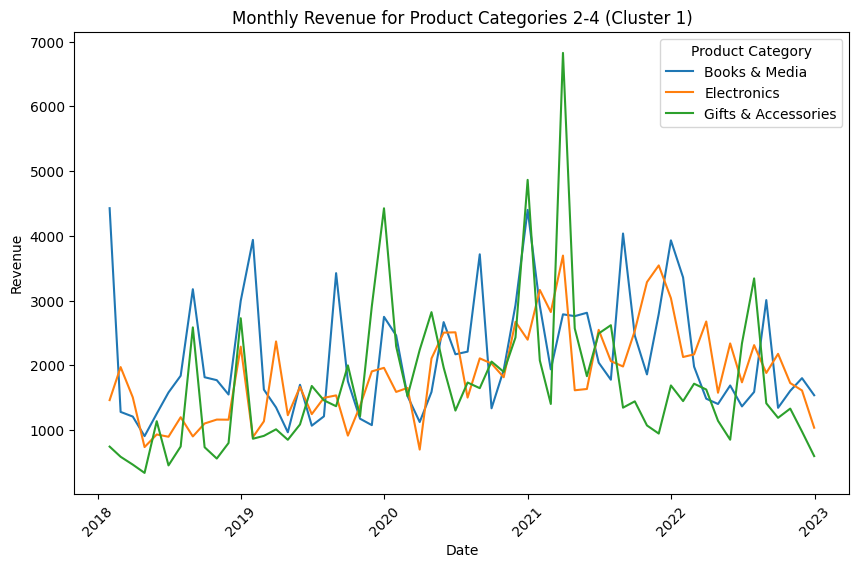

Plotting Revenue for Product Categories 2-4 - Cluster 4...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\951311243.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])


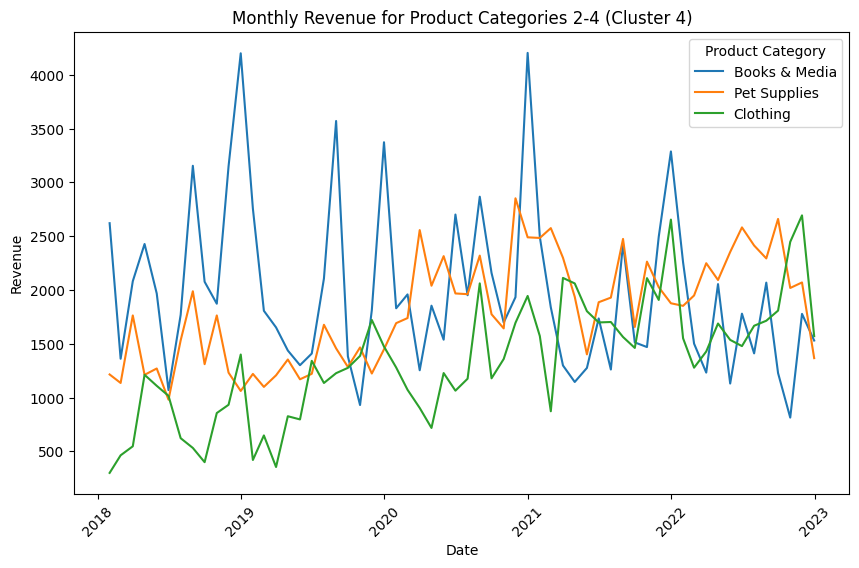

Plotting Revenue for Product Categories 2-4 - Cluster 3...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\951311243.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])


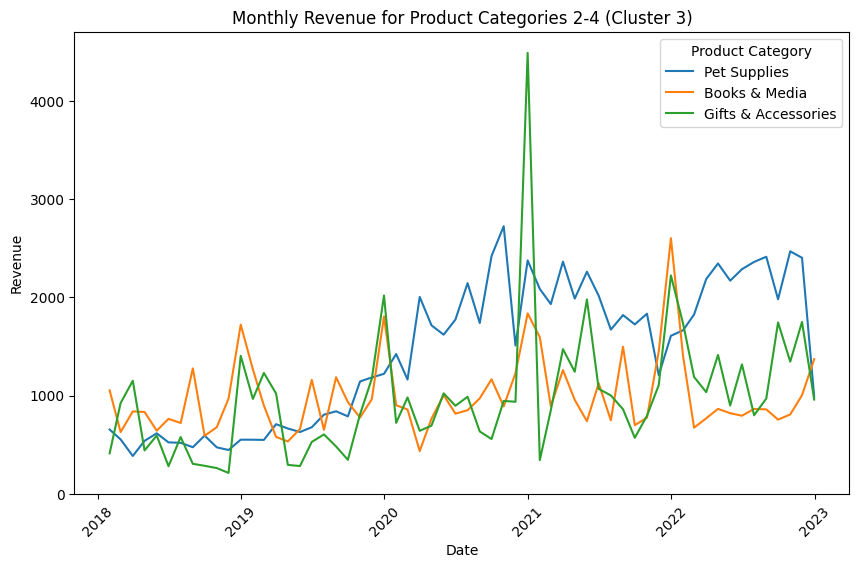

Plotting Revenue for Product Categories 2-4 - Cluster 0...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\951311243.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])


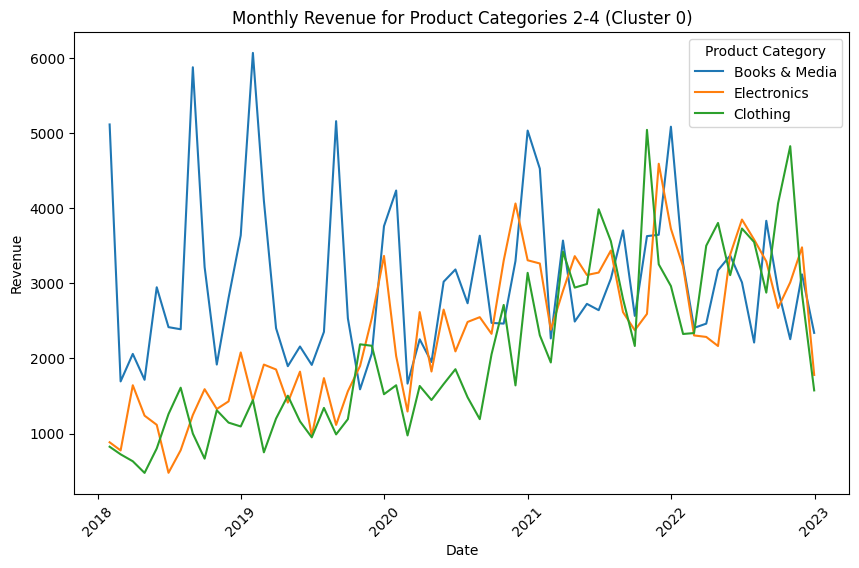

Plotting Revenue for Product Categories 2-4 - Cluster 2...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\951311243.py:25: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])


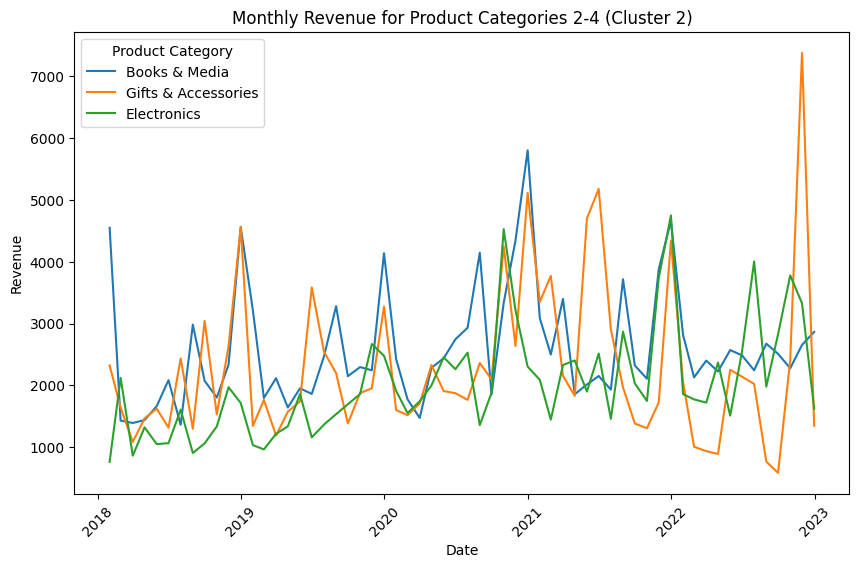

In [35]:
clusters = dat['Cluster'].unique()  # Get unique cluster labels
categories_column = 'ProductCategory'  # Define the column name for product categories

for cluster in clusters:
    print(f"Plotting Revenue for Product Categories 2-4 - Cluster {cluster}...")
    
    cluster_data = dat[dat['Cluster'] == cluster]  # Filter data for the current cluster
    
    # Group by product category and sum the revenue, then sort by revenue in descending order
    total_revenue_by_category = (
        cluster_data.groupby(categories_column)['Revenue']
        .sum()
        .reset_index()
        .sort_values(by='Revenue', ascending=False)
    )
    
    # Select the product categories ranked 2 to 4 by revenue
    categories_2_4 = total_revenue_by_category.iloc[1:4][categories_column].tolist()
    
    # Filter the data to include only the selected product categories
    cluster_filtered = cluster_data[cluster_data[categories_column].isin(categories_2_4)]
    
    # Group by month and product category, then sum the revenue
    cluster_grouped = (
        cluster_filtered.groupby([pd.Grouper(key='Order Date', freq='M'), categories_column])
                       .agg({'Revenue': 'sum'})
                       .reset_index()
    )
    
    plt.figure(figsize=(10, 6))  # Set the figure size for the plot
    for category in categories_2_4:
        category_data = cluster_grouped[cluster_grouped[categories_column] == category]  # Filter data for the current category
        plt.plot(category_data['Order Date'], category_data['Revenue'], label=category)  # Plot the revenue over time for the category

    plt.title(f"Monthly Revenue for Product Categories 2-4 (Cluster {cluster})")  # Set the plot title
    plt.xlabel("Date")  # Set the x-axis label
    plt.ylabel("Revenue")  # Set the y-axis label
    plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
    plt.legend(title="Product Category")  # Add a legend with the title "Product Category"
    plt.show()  # Display the plot

In [36]:
test_start_date = '2022-09-01'
test_end_date = '2022-12-20'

train_data = dat[dat['Order Date'] < test_start_date]
test_data = dat[(dat['Order Date'] >= test_start_date) & (dat['Order Date'] <= test_end_date)]

cluster_label = 5  
clustered_data_train = (
    train_data[train_data['Cluster'] == cluster_label]
    .groupby(pd.Grouper(key='Order Date', freq='M'))
    .agg({'Quantity': 'mean'})
    .reset_index()
)

clustered_data_test = (
    test_data[test_data['Cluster'] == cluster_label]
    .groupby(pd.Grouper(key='Order Date', freq='M'))
    .agg({'Quantity': 'mean'})
    .reset_index()
)

def forecast_cluster(train_df, test_df, cluster_label):
    print(f"Forecasting for Cluster {cluster_label}...")

    train_df = train_df.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    test_df = test_df.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})

    if len(train_df) < 2 or len(test_df) < 1:
        print(f"Not enough data to forecast for Cluster {cluster_label}. Skipping...")
        return None

    model = Prophet()
    model.fit(train_df)

    future = pd.DataFrame({'ds': test_df['ds']})
    forecast = model.predict(future)

    mae = mean_absolute_error(test_df['y'], forecast['yhat'])
    mse = mean_squared_error(test_df['y'], forecast['yhat'])
    print(f"Cluster {cluster_label} - MAE: {mae:.2f}, MSE: {mse:.2f}")

    plt.figure(figsize=(10, 6))
    plt.plot(train_df['ds'], train_df['y'], 'bo-', label='Train Data')
    plt.plot(test_df['ds'], test_df['y'], 'go-', label='Test Actual')  
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast')
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'],
                     color='pink', alpha=0.3, label='Confidence Interval')

    plt.axvline(x=train_df['ds'].max(), color='gray', linestyle='--', label='Train/Test Split')
    plt.title(f'Cluster {cluster_label} - Actual vs Forecast')
    plt.xlabel('Date')
    plt.ylabel('Average Quantity Purchased')
    plt.legend()
    plt.show()

    return {'forecast': forecast, 'mae': mae, 'mse': mse}

results_cluster_5 = forecast_cluster(clustered_data_train, clustered_data_test, cluster_label)

Forecasting for Cluster 5...
Not enough data to forecast for Cluster 5. Skipping...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\1727623940.py:10: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\1727623940.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))


In [37]:
clustered_data = (
    dat[dat['Cluster'] == cluster_label]  
    .groupby(pd.Grouper(key='Order Date', freq='M'))
    .agg({'Quantity': 'mean'})
    .reset_index()
)

def forecast_cluster(df, cluster_label):
    print(f"Forecasting for Cluster {cluster_label}...")
    
    df = df.rename(columns={'Order Date': 'ds', 'Quantity': 'y'})
    
    if len(df) < 2:
        print(f"Not enough data to forecast for Cluster {cluster_label}. Skipping...")
        return None
    
    model = Prophet()
    model.fit(df)
    
    future = model.make_future_dataframe(periods=3, freq='M')
    forecast = model.predict(future)
    
    plt.figure(figsize=(10, 6))
    plt.plot(df['ds'], df['y'], 'bo-', label='Actual Data') 
    plt.plot(forecast['ds'], forecast['yhat'], 'r-', label='Forecast') 
    plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], 
                     color='pink', alpha=0.3, label='Confidence Interval') 

    plt.axvline(x=df['ds'].max(), color='gray', linestyle='--', label='Forecast Start') 
    plt.title(f'Cluster {cluster_label} - Quantity Forecast')
    plt.xlabel('Date')
    plt.ylabel('Average Quantity Purchased')
    plt.legend()
    plt.show()
    
    return forecast

forecast_cluster(clustered_data, cluster_label)

Forecasting for Cluster 5...
Not enough data to forecast for Cluster 5. Skipping...


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\881483442.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  .groupby(pd.Grouper(key='Order Date', freq='M'))


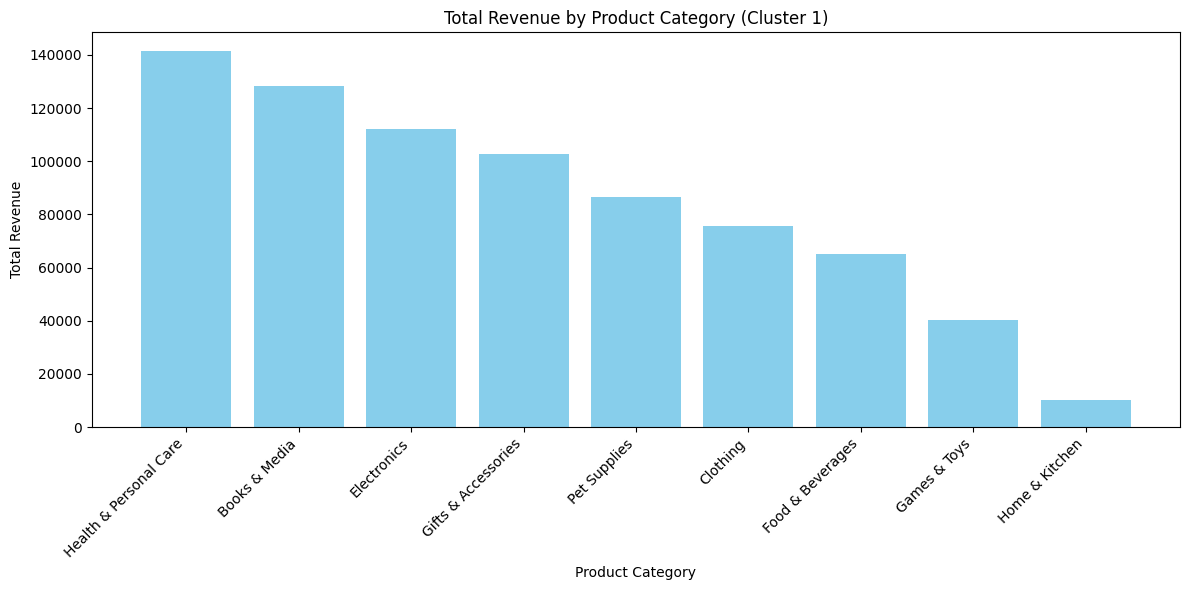

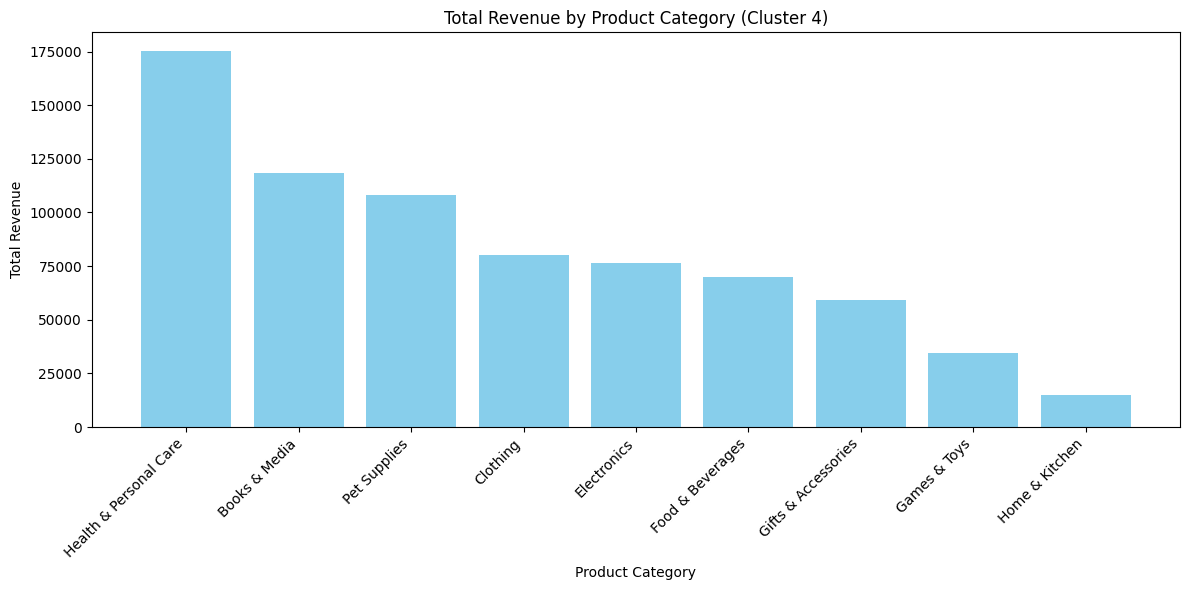

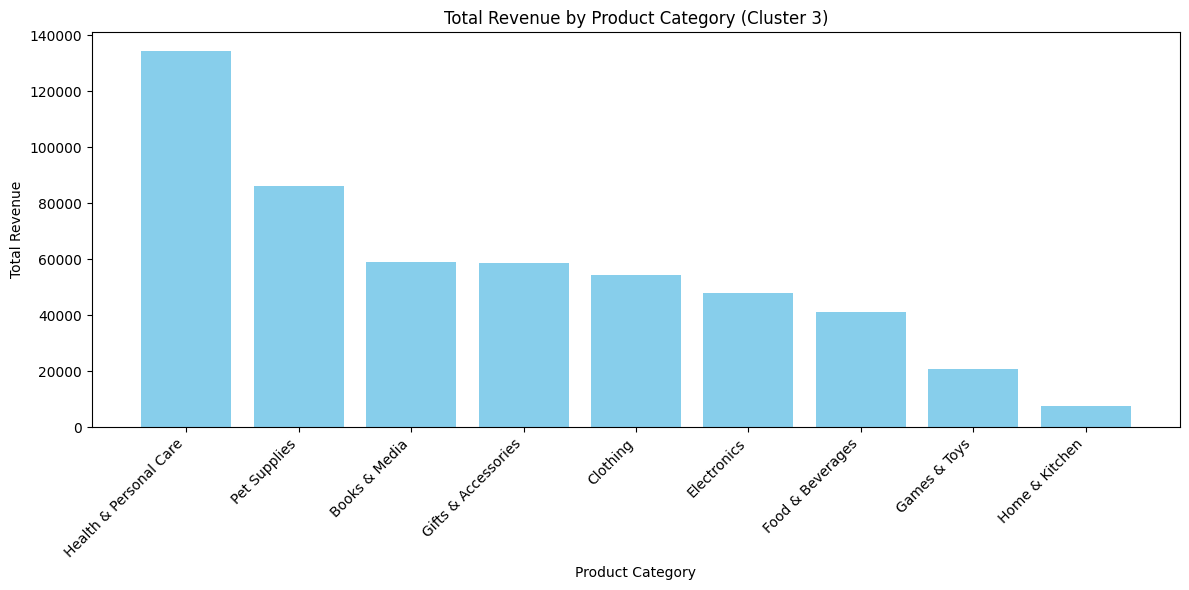

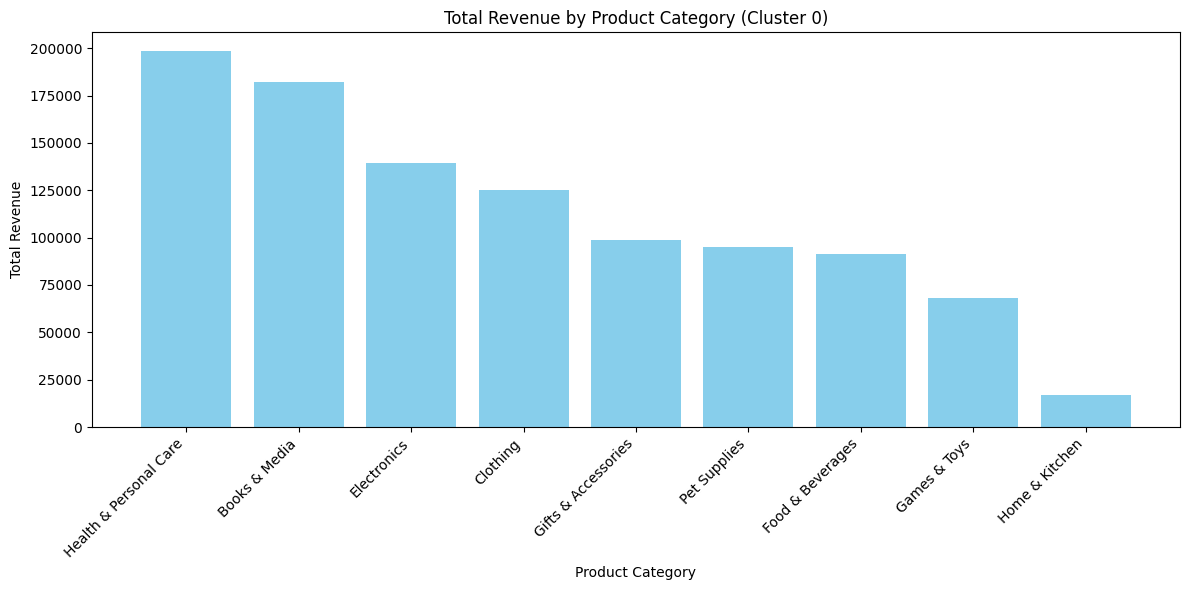

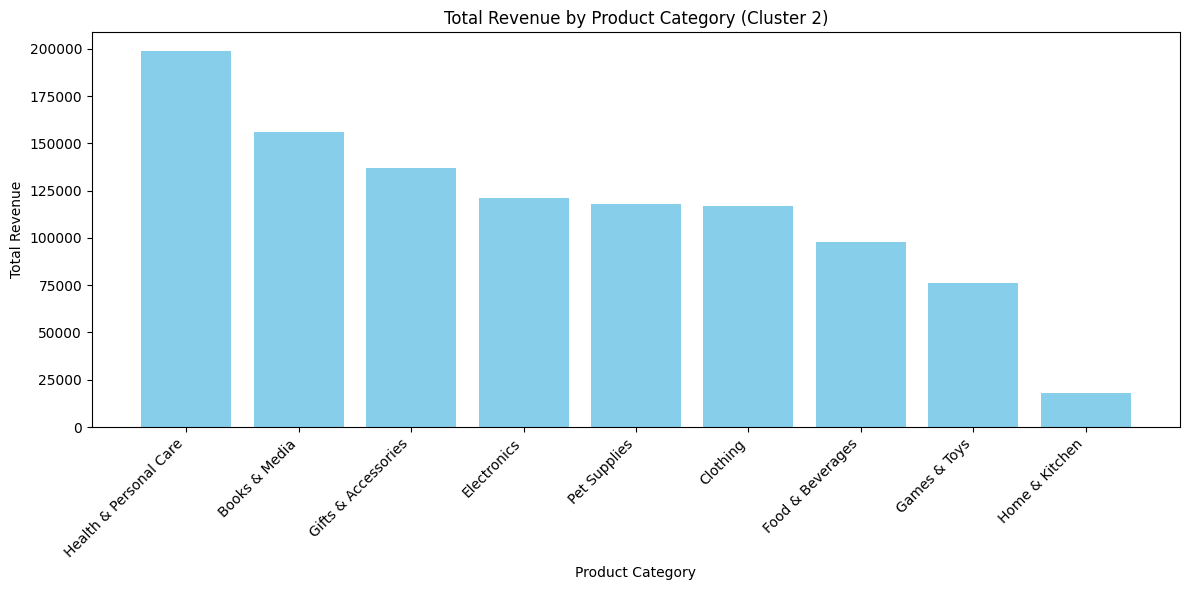

In [38]:
clusters = dat['Cluster'].unique()

for cluster_label in clusters:    
    cluster_data = dat[(dat['Cluster'] == cluster_label) & (dat['ProductCategory'] != 'Other')]
    
    category_summary = (
        cluster_data.groupby('ProductCategory')
                    .agg({'Revenue': 'sum'})
                    .sort_values(by='Revenue', ascending=False)
                    .reset_index()
    )
    
    # print(f"Top Product Categories for Cluster {cluster_label}:")
    # print(category_summary)
    
    plt.figure(figsize=(12, 6))
    plt.bar(category_summary['ProductCategory'], category_summary['Revenue'], color='skyblue')
    plt.title(f"Total Revenue by Product Category (Cluster {cluster_label})")
    plt.xlabel("Product Category")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Further data exploration

C:\Users\ADMIN\AppData\Local\Temp\ipykernel_88552\2318754211.py:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  filtered_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Cluster'])


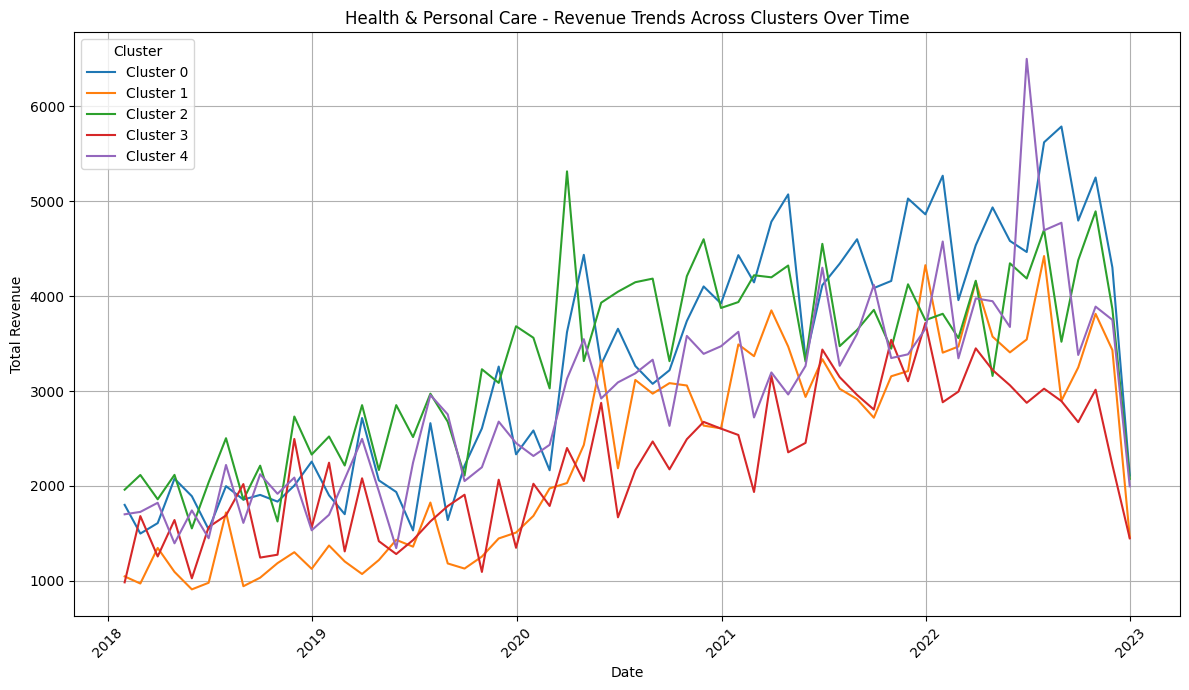

In [39]:
# Filter the data to include only 'Health & Personal Care' products
filtered_data = dat[dat['ProductCategory'] == 'Health & Personal Care']

# Aggregate the data by month and cluster, summing the 'Revenue' column
aggregated_data = (
    filtered_data.groupby([pd.Grouper(key='Order Date', freq='M'), 'Cluster'])
                 .agg({'Revenue': 'sum'})
                 .reset_index()
)

# Create a figure for the plot with specified size
plt.figure(figsize=(12, 7))

# Loop through each unique cluster and plot the revenue trends over time
for cluster in aggregated_data['Cluster'].unique():
    cluster_data = aggregated_data[aggregated_data['Cluster'] == cluster]
    plt.plot(cluster_data['Order Date'], cluster_data['Revenue'], label=f'Cluster {cluster}')

# Set the title and labels for the plot
plt.title("Health & Personal Care - Revenue Trends Across Clusters Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")

# Add a legend with the title "Cluster"
plt.legend(title="Cluster")

# Add grid lines to the plot
plt.grid()

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Adjust the layout to fit all elements
plt.tight_layout()

# Display the plot
plt.show()

In [40]:
import pandasql as ps

# Define the SQL query to calculate total revenue and total orders per cluster
query = """
SELECT 
    Cluster,
    SUM(Revenue) AS total_revenue,
    COUNT(*) AS total_orders
FROM dat    
GROUP BY Cluster
ORDER BY total_revenue DESC
"""

# Execute the SQL query using pandasql and store the result in a DataFrame
cluster_revenue = ps.sqldf(query, locals())

# Display the resulting DataFrame
cluster_revenue

,Cluster,total_revenue,total_orders
0,2,1140648.32,56714
1,0,1100817.09,57644
2,1,821717.54,44059
3,4,817035.59,39139
4,3,553070.59,30636


Average Price Per Purchase by Cluster:
   Cluster  Avg_Price_Per_Purchase
0        0               17.357570
1        1               17.233286
2        2               18.488205
3        3               16.165037
4        4               18.465333


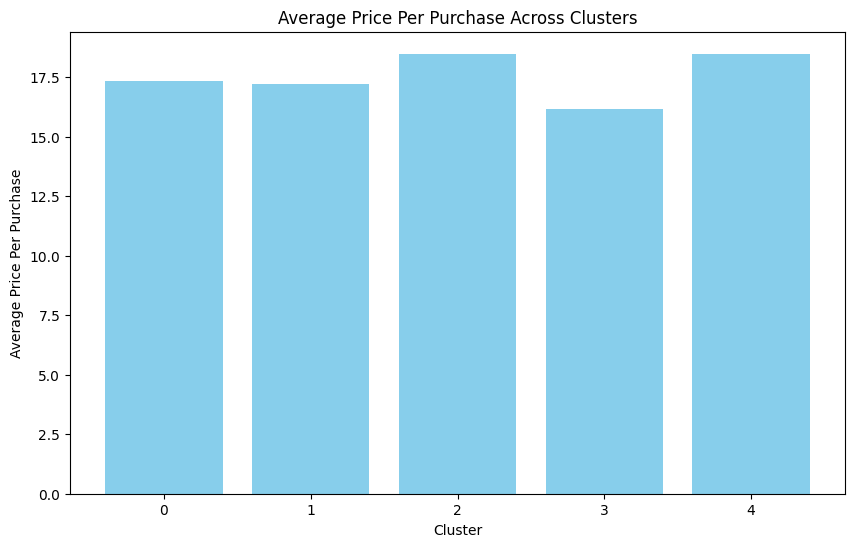

In [41]:
# Group the data by 'Cluster' and aggregate the 'Revenue' and 'Quantity' columns
cluster_price_per_purchase = (
    dat.groupby('Cluster')
       .agg({'Revenue': 'sum', 'Quantity': 'sum'})
       .reset_index()
)

# Calculate the average price per purchase for each cluster
cluster_price_per_purchase['Avg_Price_Per_Purchase'] = (
    cluster_price_per_purchase['Revenue'] / cluster_price_per_purchase['Quantity']
)

# Print the average price per purchase by cluster
print("Average Price Per Purchase by Cluster:")
print(cluster_price_per_purchase[['Cluster', 'Avg_Price_Per_Purchase']])

# Plot the average price per purchase across clusters
plt.figure(figsize=(10, 6))
plt.bar(cluster_price_per_purchase['Cluster'], cluster_price_per_purchase['Avg_Price_Per_Purchase'], color='skyblue')
plt.title('Average Price Per Purchase Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Average Price Per Purchase')
plt.xticks(cluster_price_per_purchase['Cluster'])
plt.show()

## Spending by age group


Analyzing Product Categories for Age Group 2...
Top Product Categories for Age Group 2:
          ProductCategory    Revenue
0  Health & Personal Care  253647.85
1           Books & Media  185691.39
2     Gifts & Accessories  181825.88
3            Pet Supplies  163474.18
4                Clothing  142966.67
5        Food & Beverages  136767.54
6             Electronics  136185.38
7            Games & Toys  104667.37
8          Home & Kitchen   22058.66


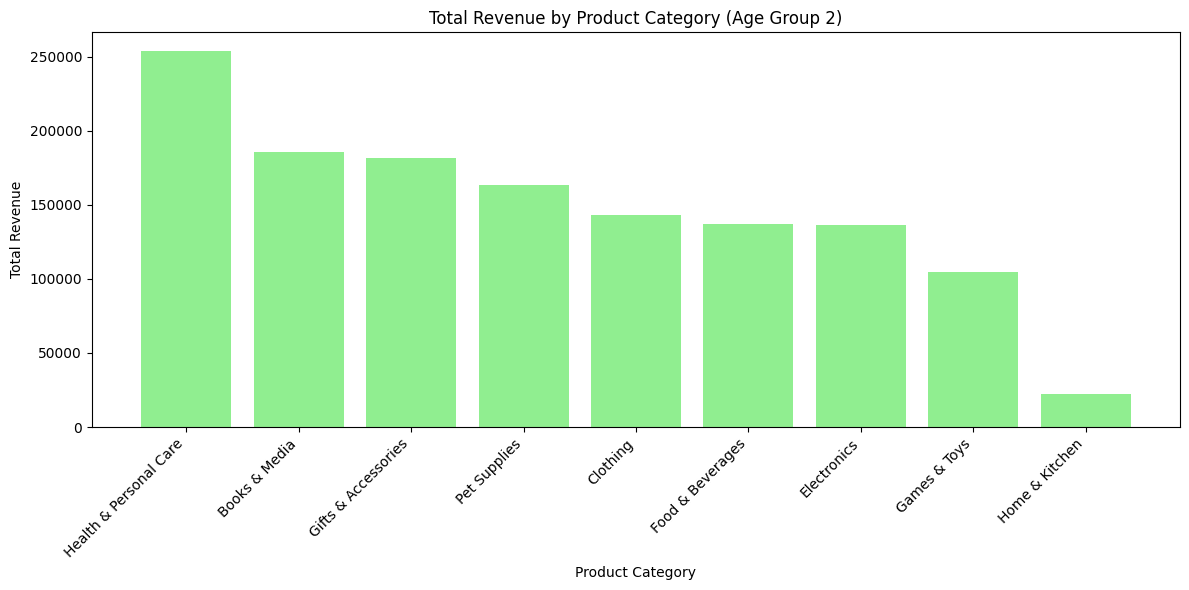


Analyzing Product Categories for Age Group 1...
Top Product Categories for Age Group 1:
          ProductCategory    Revenue
0  Health & Personal Care  231368.54
1           Books & Media  204285.13
2             Electronics  177927.01
3                Clothing  141033.12
4     Gifts & Accessories  134743.40
5            Pet Supplies  117486.26
6        Food & Beverages   99805.39
7            Games & Toys   67286.53
8          Home & Kitchen   19775.43


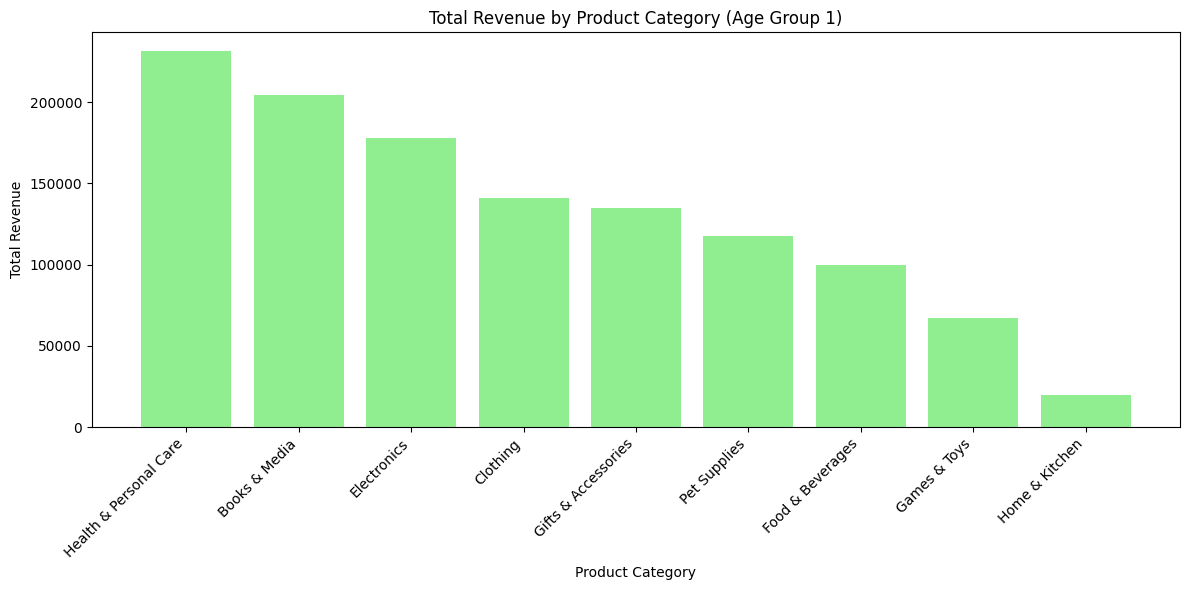


Analyzing Product Categories for Age Group 5...
Top Product Categories for Age Group 5:
          ProductCategory   Revenue
0  Health & Personal Care  41636.88
1           Books & Media  23180.96
2            Pet Supplies  21253.57
3     Gifts & Accessories  18295.66
4        Food & Beverages  15963.64
5             Electronics  12650.99
6                Clothing  11389.11
7            Games & Toys   5754.59
8          Home & Kitchen   4469.48


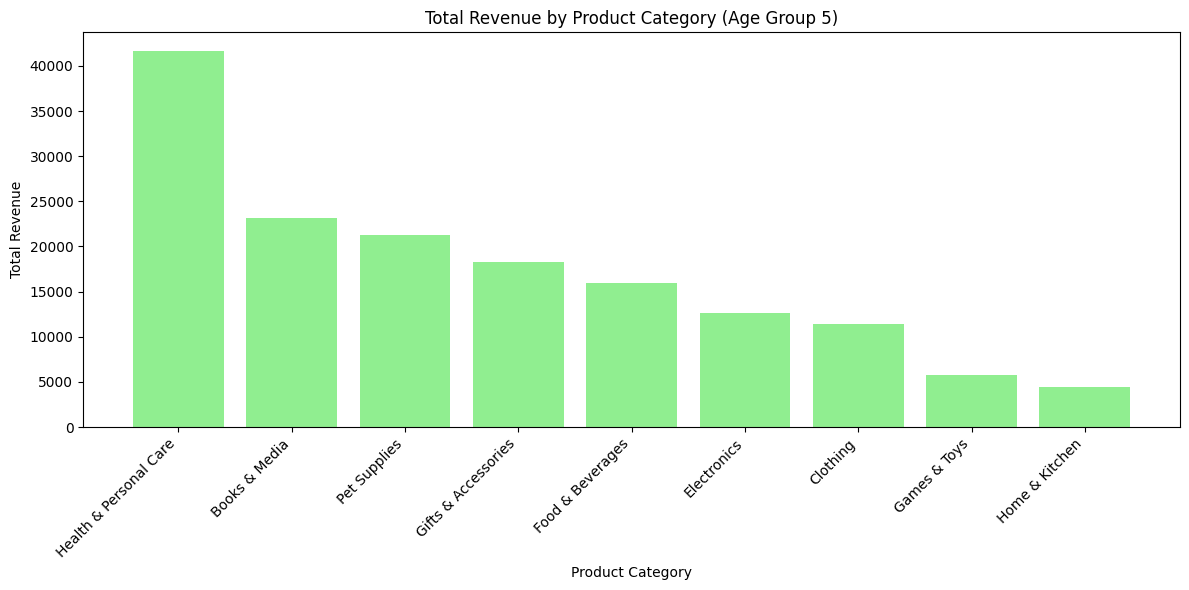


Analyzing Product Categories for Age Group 3...
Top Product Categories for Age Group 3:
          ProductCategory    Revenue
0  Health & Personal Care  183333.27
1           Books & Media  106313.53
2            Pet Supplies  103442.73
3                Clothing   81739.58
4             Electronics   75275.34
5        Food & Beverages   65436.30
6     Gifts & Accessories   65248.39
7            Games & Toys   38082.33
8          Home & Kitchen   10993.38


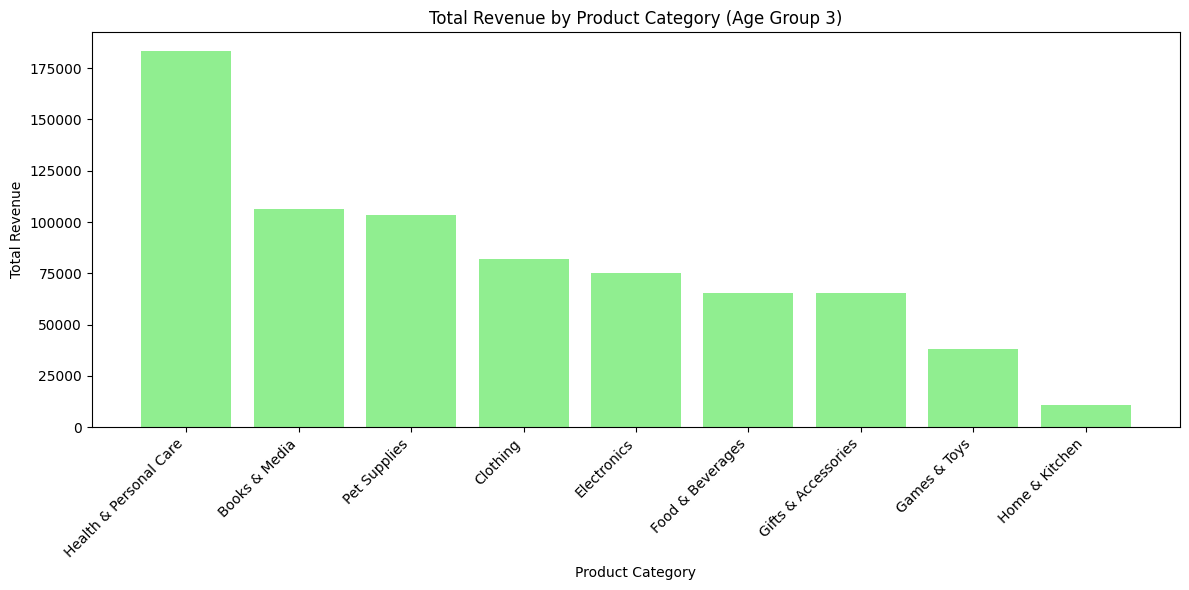


Analyzing Product Categories for Age Group 4...
Top Product Categories for Age Group 4:
          ProductCategory   Revenue
0  Health & Personal Care  84559.47
1            Pet Supplies  69935.81
2           Books & Media  47937.30
3                Clothing  41225.69
4             Electronics  36431.52
5     Gifts & Accessories  34457.95
6        Food & Beverages  29608.23
7            Games & Toys  11200.66
8          Home & Kitchen   7333.76


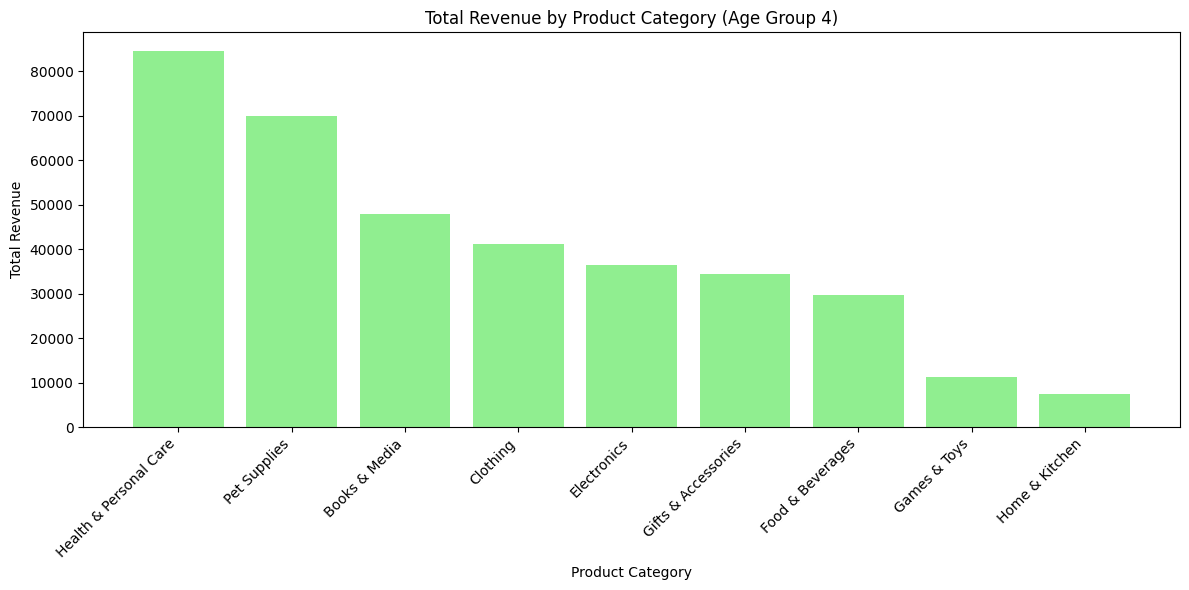


Analyzing Product Categories for Age Group 0...
Top Product Categories for Age Group 0:
          ProductCategory   Revenue
0           Books & Media  76064.12
1             Electronics  58390.21
2  Health & Personal Care  53575.98
3                Clothing  33575.84
4     Gifts & Accessories  21967.39
5            Pet Supplies  18513.03
6        Food & Beverages  17752.44
7            Games & Toys  12814.21
8          Home & Kitchen   3189.32


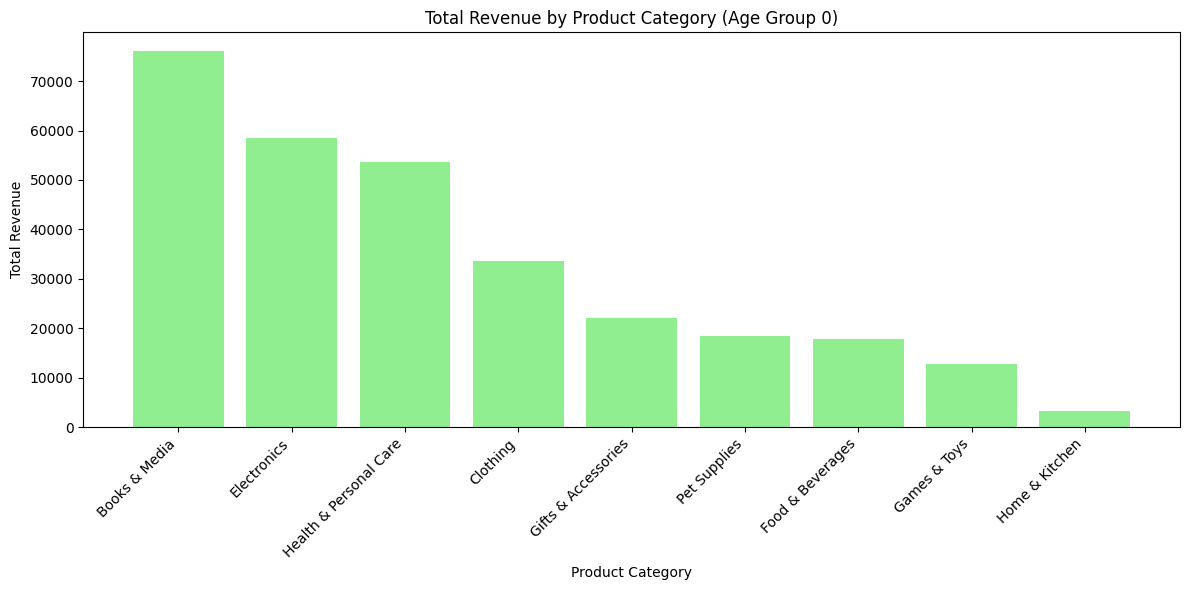

In [42]:
# Get unique age groups from the dataset
age_groups = dat['Q-demos-age'].unique()

# Loop through each age group
for age in age_groups:
    print(f"\nAnalyzing Product Categories for Age Group {age}...")
    
    # Filter data for the current age group and exclude 'Other' category
    age_data = dat[(dat['Q-demos-age'] == age) & (dat['ProductCategory'] != 'Other')]
    
    # Group by product category and sum the revenue, then sort by revenue in descending order
    category_summary = (
        age_data.groupby('ProductCategory')
                .agg({'Revenue': 'sum'})
                .sort_values(by='Revenue', ascending=False)
                .reset_index()
    )
    
    # Print the top product categories for the current age group
    print(f"Top Product Categories for Age Group {age}:")
    print(category_summary)
    
    # Plot the total revenue by product category for the current age group
    plt.figure(figsize=(12, 6))
    plt.bar(category_summary['ProductCategory'], category_summary['Revenue'], color='lightgreen')
    plt.title(f"Total Revenue by Product Category (Age Group {age})")
    plt.xlabel("Product Category")
    plt.ylabel("Total Revenue")
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

## Final models

In [43]:
dat['Revenue'] = dat['Purchase Price Per Unit'] * dat['Quantity']

cluster_data = dat[['Order Date', 'Cluster', 'ProductCategory', 'Revenue']]

cluster_1_data = cluster_data[(cluster_data['Cluster'] == 1) & (cluster_data['ProductCategory'] == 'Electronics')]

Epoch 1/100


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


15/15 ━━━━━━━━━━━━━━━━━━━━ 3s 36ms/step - loss: 0.6371 - mae: 0.5799 - val_loss: 0.4929 - val_mae: 0.5831
Epoch 2/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4777 - mae: 0.5370 - val_loss: 0.4941 - val_mae: 0.6061
Epoch 3/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.4081 - mae: 0.4888 - val_loss: 0.4891 - val_mae: 0.6105
Epoch 4/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3546 - mae: 0.4562 - val_loss: 0.5208 - val_mae: 0.6325
Epoch 5/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3296 - mae: 0.4458 - val_loss: 0.5024 - val_mae: 0.6079
Epoch 6/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3354 - mae: 0.4500 - val_loss: 0.5137 - val_mae: 0.6181
Epoch 7/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 0.3151 - mae: 0.4358 - val_loss: 0.5647 - val_mae: 0.6454
Epoch 8/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.2929 - mae: 0.3873 - val_loss: 0.5110 - val_mae: 0.6127
Epoch 9/100
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - loss: 0.3620 -

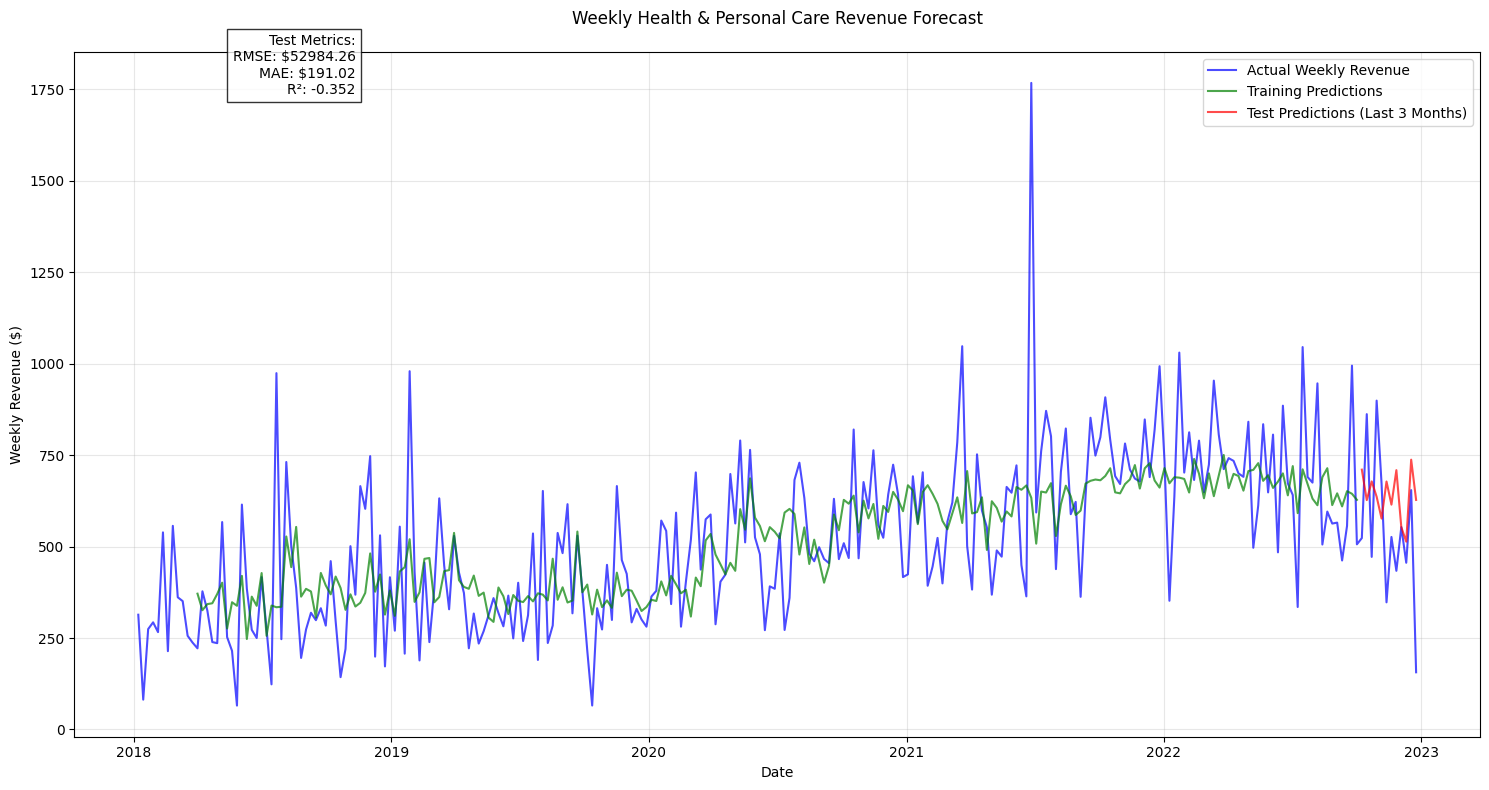

In [44]:
from datetime import timedelta
import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.preprocessing import RobustScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.callbacks import EarlyStopping

def plot_forecast_last_three_months(cluster_data, sequence_length=12):
    # 1. Prepare Data
    mask = (cluster_data['Cluster'] == 3) & (cluster_data['ProductCategory'] == 'Health & Personal Care')
    df = cluster_data[mask].copy()
    
    df['Order Date'] = pd.to_datetime(df['Order Date'])  # Convert 'Order Date' to datetime
    daily_data = df.set_index('Order Date')['Revenue']  # Set 'Order Date' as index and select 'Revenue'
    
    weekly_revenue = daily_data.resample('W').sum()  # Resample to weekly data and sum revenue
    weekly_revenue = weekly_revenue.fillna(weekly_revenue.rolling(window=3, min_periods=1).mean())  # Fill missing values with rolling mean
    
    # 2. Scale the data using RobustScaler
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(weekly_revenue.values.reshape(-1, 1))  # Scale the data
    
    # 3. Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length), 0])  # Create input sequences
        y.append(scaled_data[i + sequence_length, 0])  # Create corresponding targets
    X, y = np.array(X), np.array(y)
    
    # Reshape X for RNN input (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Split data - last 12 weeks (3 months) as test set
    test_size = 12
    X_train, X_test = X[:-test_size], X[-test_size:]  # Split input sequences
    y_train, y_test = y[:-test_size], y[-test_size:]  # Split targets
    
    # 4. Build and train the model
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), return_sequences=True),  # First RNN layer
        Dropout(0.2),  # Dropout layer for regularization
        SimpleRNN(16),  # Second RNN layer
        Dense(1)  # Output layer
    ])
    
    model.compile(optimizer='SGD', loss='mse', metrics=['mae'])  # Compile the model
    
    early_stopping = EarlyStopping(monitor='val_loss', patience=15, restore_best_weights=True)  # Early stopping callback
    
    history = model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        validation_data=(X_test, y_test),
        callbacks=[early_stopping],
        verbose=1
    )
    
    # 5. Make predictions
    train_predict = model.predict(X_train)  # Predict on training data
    test_predict = model.predict(X_test)  # Predict on test data
    
    # Inverse transform predictions
    train_predict = scaler.inverse_transform(train_predict)  # Inverse scale training predictions
    test_predict = scaler.inverse_transform(test_predict)  # Inverse scale test predictions
    y_train_orig = scaler.inverse_transform(y_train.reshape(-1, 1))  # Inverse scale training targets
    y_test_orig = scaler.inverse_transform(y_test.reshape(-1, 1))  # Inverse scale test targets
    
    train_dates = weekly_revenue.index[sequence_length:sequence_length + len(train_predict)]  # Get training dates
    test_dates = weekly_revenue.index[-test_size:]  # Get test dates
    
    # 6. Plot results
    plt.figure(figsize=(15, 8))
    plt.plot(weekly_revenue.index, weekly_revenue.values, 
             label='Actual Weekly Revenue', color='blue', alpha=0.7)  # Plot actual revenue
    plt.plot(train_dates, train_predict, 
             label='Training Predictions', color='green', alpha=0.7)  # Plot training predictions
    plt.plot(test_dates, test_predict, 
             label='Test Predictions (Last 3 Months)', color='red', alpha=0.7)  # Plot test predictions
    
    plt.title('Weekly Health & Personal Care Revenue Forecast', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Weekly Revenue ($)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    test_mse = mean_squared_error(y_test_orig, test_predict)  # Calculate test MSE
    test_mae = mean_absolute_error(y_test_orig, test_predict)  # Calculate test MAE
    test_r2 = r2_score(y_test_orig, test_predict)  # Calculate test R²
    
    metrics_text = f'Test Metrics:\nRMSE: ${test_mse:.2f}\nMAE: ${test_mae:.2f}\nR²: {test_r2:.3f}'
    plt.text(0.20, 0.98, metrics_text, transform=plt.gca().transAxes, 
            bbox=dict(facecolor='white', alpha=0.8), 
            verticalalignment='center', horizontalalignment='right', fontsize=10)  # Display metrics on plot

    plt.tight_layout()
    plt.show()
    
    return {
        'test_rmse': test_mse,
        'test_mae': test_mae,
        'test_r2': test_r2,
        'test_predictions': test_predict.flatten(),
        'test_dates': test_dates
    }

# Usage
metrics = plot_forecast_last_three_months(cluster_data)

## Using the Selected Model and all the dat to forecats the next 3 months

Epoch 1/100


c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.8680 - mae: 0.6274
Epoch 2/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3937 - mae: 0.4661
Epoch 3/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.4046 - mae: 0.4558
Epoch 4/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2460 - mae: 0.3602
Epoch 5/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3378 - mae: 0.4144
Epoch 6/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3701 - mae: 0.4380
Epoch 7/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3270 - mae: 0.4218
Epoch 8/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2848 - mae: 0.3944
Epoch 9/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.2624 - mae: 0.4012
Epoch 10/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3027 - mae: 0.3920
Epoch 11/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3011 - mae: 0.4118
Epoch 12/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3689 - mae: 0.4302
Epoch 13/100
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/st

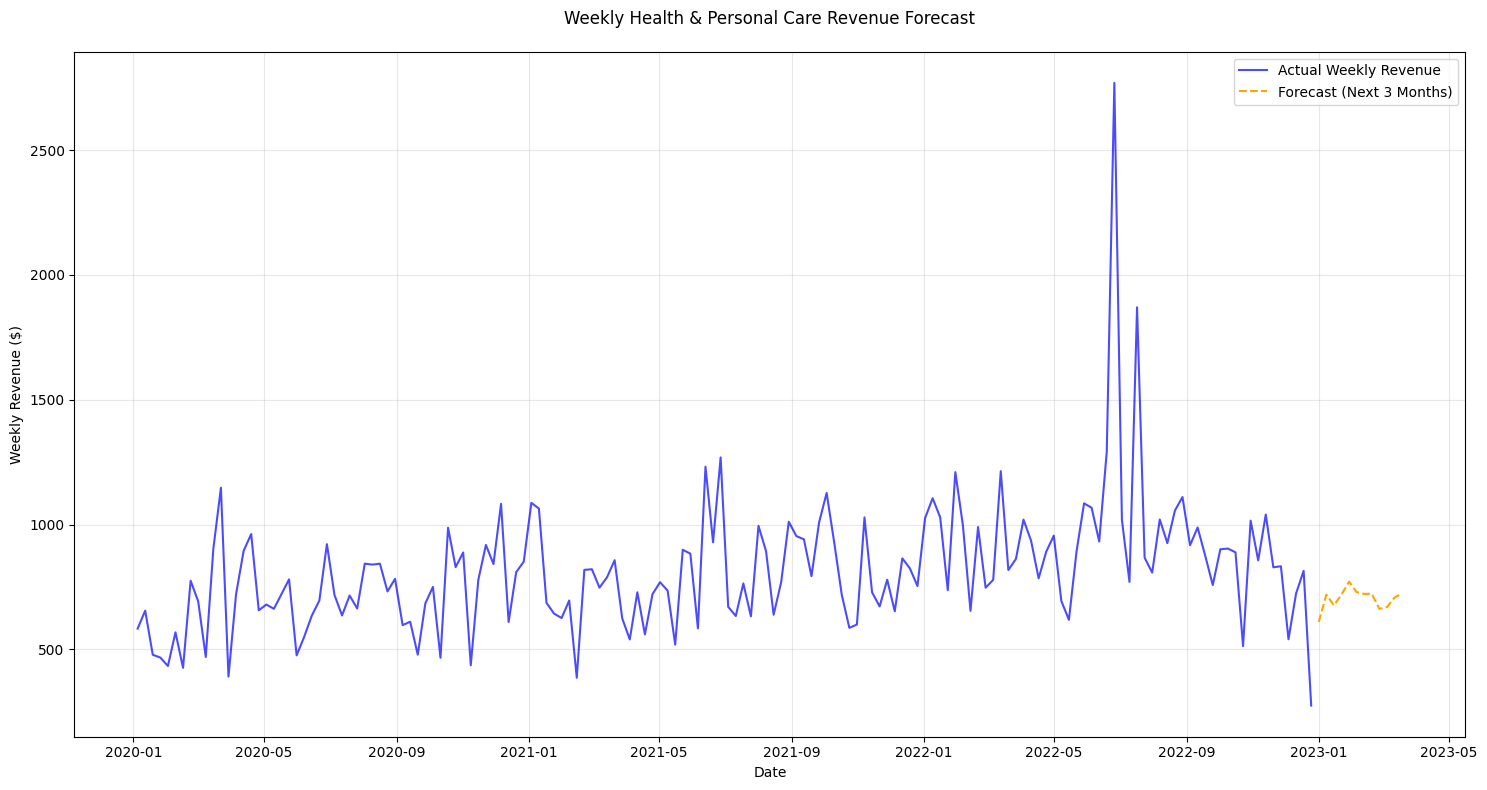

In [45]:
def forecast_next_three_months(cluster_data, sequence_length=12):
    # 1. Prepare Data
    mask = (cluster_data['Cluster'] == 4) & (cluster_data['ProductCategory'] == 'Health & Personal Care')
    df = cluster_data[mask].copy()
    
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    daily_data = df.set_index('Order Date')['Revenue']
    
    weekly_revenue = daily_data.resample('W').sum()
    weekly_revenue = weekly_revenue.fillna(weekly_revenue.rolling(window=3, min_periods=1).mean())
    
    # 2. Scale the data using RobustScaler
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(weekly_revenue.values.reshape(-1, 1))
    
    # 3. Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length), 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    
    # Reshape X for RNN input (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Use all data for training
    X_train, y_train = X, y

    # 4. Build and train the model
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), return_sequences=True),
        Dropout(0.2),
        SimpleRNN(16),
        Dense(1)
    ])
    
    model.compile(optimizer='SGD', loss='mse', metrics=['mae'])
    
    early_stopping = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    
    model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        callbacks=[early_stopping],
        verbose=1
    )
    
    # 5. Forecast next 12 weeks
    last_sequence = scaled_data[-sequence_length:]
    forecast = []
    
    for _ in range(12):
        pred = model.predict(last_sequence.reshape(1, sequence_length, 1))
        forecast.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred)
    
    # Inverse transform predictions
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

    # Generate future dates
    last_date = weekly_revenue.index[-1]
    future_dates = [last_date + timedelta(weeks=i) for i in range(1, 13)]

    # 6. Plot results starting from 2020
    start_date = pd.Timestamp('2020-01-01')
    weekly_revenue_2020_onwards = weekly_revenue[start_date:]

    plt.figure(figsize=(15, 8))
    plt.plot(weekly_revenue_2020_onwards.index, weekly_revenue_2020_onwards.values, 
             label='Actual Weekly Revenue', color='blue', alpha=0.7)
    plt.plot(future_dates, forecast, 
             label='Forecast (Next 3 Months)', color='orange', linestyle='--')
    
    plt.title('Weekly Health & Personal Care Revenue Forecast', pad=20)
    plt.xlabel('Date')
    plt.ylabel('Weekly Revenue ($)')
    plt.grid(True, alpha=0.3)
    plt.legend()
    
    plt.tight_layout()
    plt.show()

    return {
        'forecast': forecast,
        'future_dates': future_dates
    }

# Usage
forecast_results = forecast_next_three_months(cluster_data)

## Actual forecasted revenue for the next three months

In [46]:
# Extract the forecasted values
forecasted_values = forecast_results['forecast']

# Extract the corresponding future dates
future_dates = forecast_results['future_dates']

# If you want to create a DataFrame with the forecasted data
import pandas as pd

forecast_df = pd.DataFrame({
    'Date': future_dates,
    'Forecasted_Revenue': forecasted_values
})

# Display the first few rows of the forecast
print(forecast_df)

         Date  Forecasted_Revenue
0  2023-01-01          609.910645
1  2023-01-08          719.247070
2  2023-01-15          676.434570
3  2023-01-22          719.191345
4  2023-01-29          771.440552
5  2023-02-05          729.209045
6  2023-02-12          722.014648
7  2023-02-19          723.072693
8  2023-02-26          662.264465
9  2023-03-05          669.087158
10 2023-03-12          707.466736
11 2023-03-19          724.087036


## Comparing all clusters

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Pytho

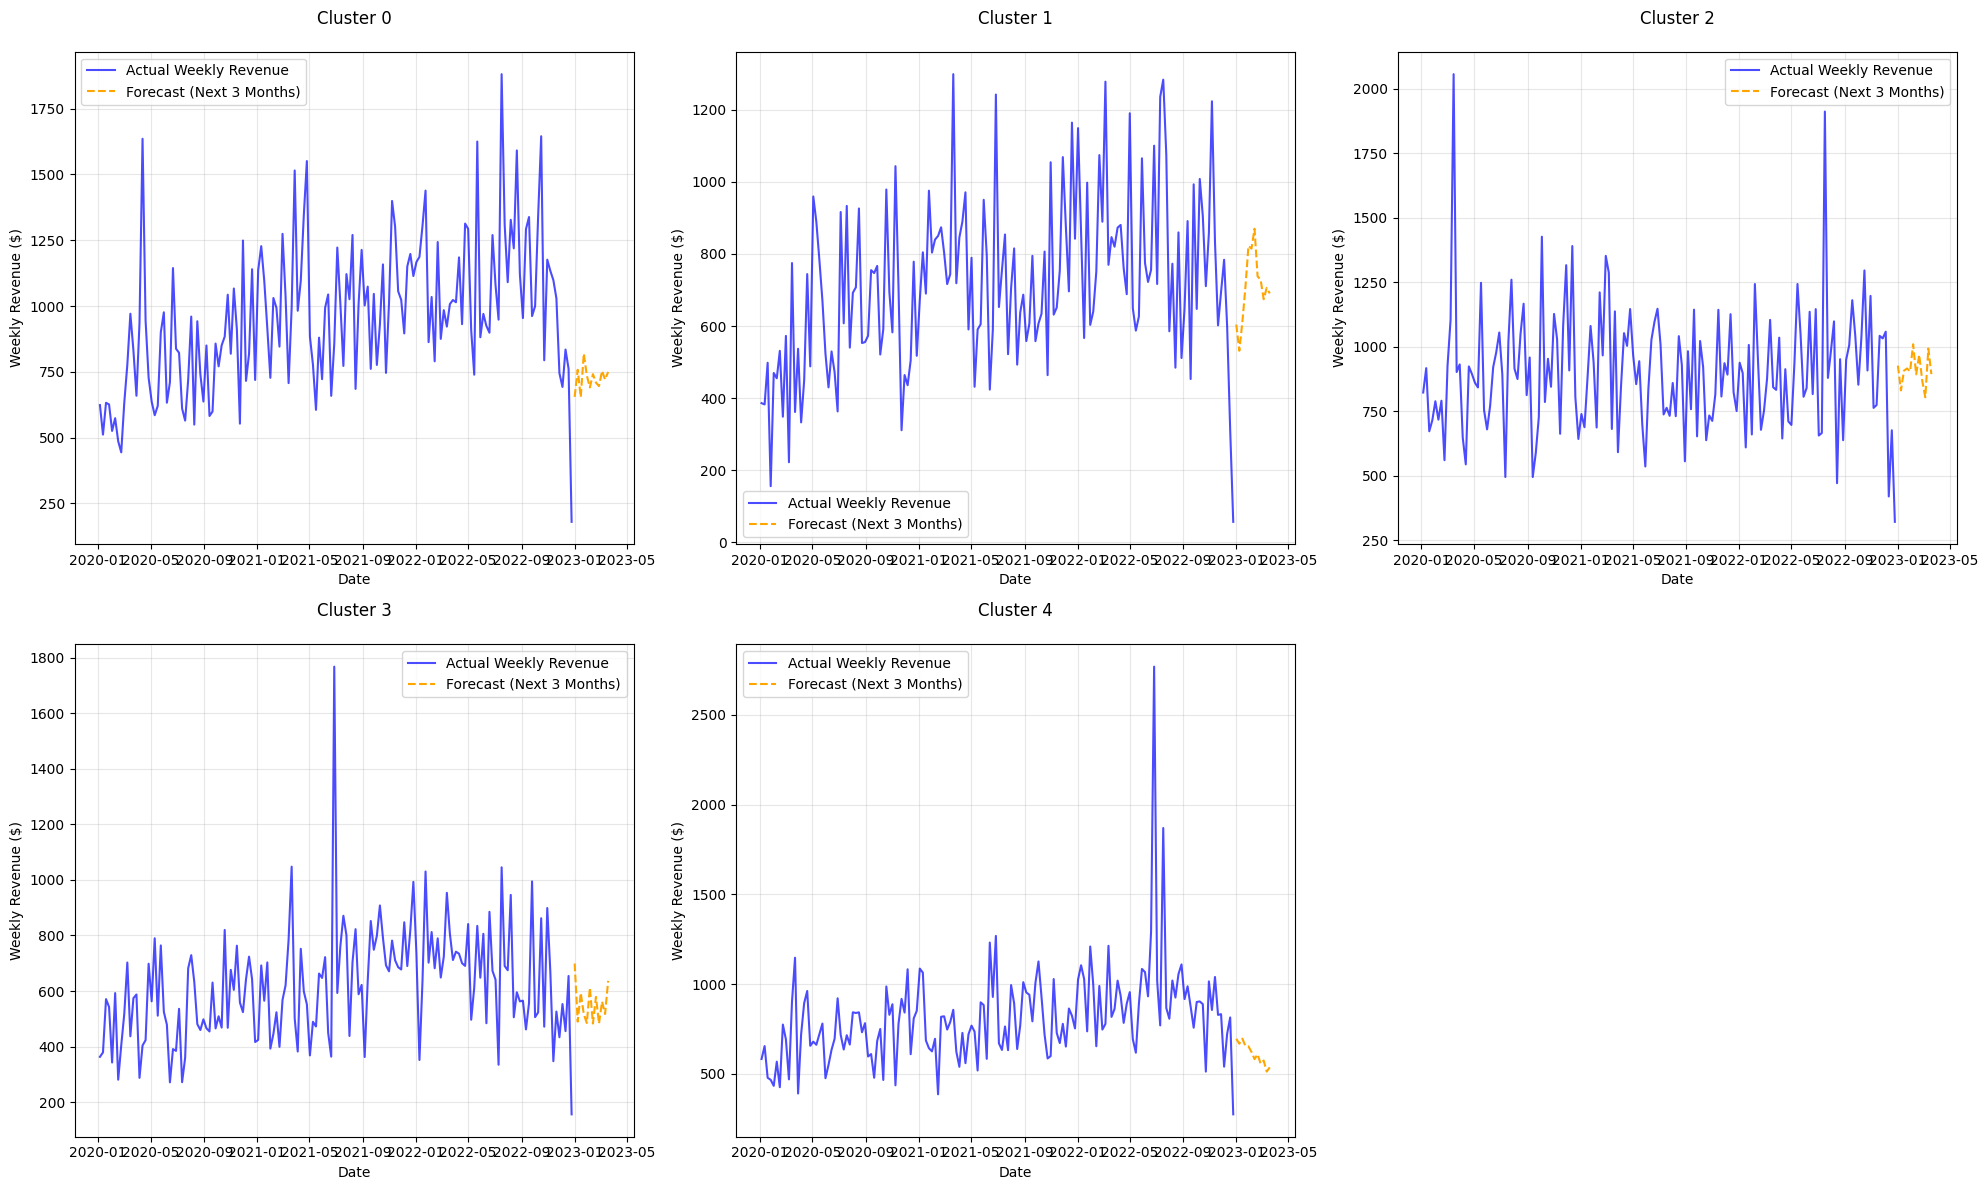

In [47]:
def forecast_cluster(cluster_data, cluster, sequence_length=12):
    # 1. Prepare Data
    mask = (cluster_data['Cluster'] == cluster) & (cluster_data['ProductCategory'] == 'Health & Personal Care')
    df = cluster_data[mask].copy()
    
    df['Order Date'] = pd.to_datetime(df['Order Date'])
    daily_data = df.set_index('Order Date')['Revenue']
    
    weekly_revenue = daily_data.resample('W').sum()
    weekly_revenue = weekly_revenue.fillna(weekly_revenue.rolling(window=3, min_periods=1).mean())
    
    # 2. Scale the data using RobustScaler
    scaler = RobustScaler()
    scaled_data = scaler.fit_transform(weekly_revenue.values.reshape(-1, 1))
    
    # 3. Create sequences
    X, y = [], []
    for i in range(len(scaled_data) - sequence_length):
        X.append(scaled_data[i:(i + sequence_length), 0])
        y.append(scaled_data[i + sequence_length, 0])
    X, y = np.array(X), np.array(y)
    
    # Reshape X for RNN input (samples, time steps, features)
    X = X.reshape((X.shape[0], X.shape[1], 1))
    
    # Use all data for training
    X_train, y_train = X, y

    # 4. Build and train the model
    model = Sequential([
        SimpleRNN(32, input_shape=(sequence_length, 1), return_sequences=True),
        Dropout(0.2),
        SimpleRNN(16),
        Dense(1)
    ])
    
    model.compile(optimizer='SGD', loss='mse', metrics=['mae'])
    
    early_stopping = EarlyStopping(monitor='loss', patience=15, restore_best_weights=True)
    
    model.fit(
        X_train, y_train,
        epochs=100,
        batch_size=16,
        callbacks=[early_stopping],
        verbose=0
    )
    
    # 5. Forecast next 12 weeks
    last_sequence = scaled_data[-sequence_length:]
    forecast = []
    
    for _ in range(12):
        pred = model.predict(last_sequence.reshape(1, sequence_length, 1), verbose=0)
        forecast.append(pred[0, 0])
        last_sequence = np.append(last_sequence[1:], pred)
    
    # Inverse transform predictions
    forecast = scaler.inverse_transform(np.array(forecast).reshape(-1, 1)).flatten()

    # Generate future dates
    last_date = weekly_revenue.index[-1]
    future_dates = [last_date + timedelta(weeks=i) for i in range(1, 13)]

    return weekly_revenue, forecast, future_dates

def plot_all_clusters(cluster_data):
    fig, axs = plt.subplots(2, 3, figsize=(20, 12))
    axs = axs.flatten()

    for cluster in range(5):
        weekly_revenue, forecast, future_dates = forecast_cluster(cluster_data, cluster)
        
        start_date = pd.Timestamp('2020-01-01')
        weekly_revenue_2020_onwards = weekly_revenue[start_date:]

        axs[cluster].plot(weekly_revenue_2020_onwards.index, weekly_revenue_2020_onwards.values, 
                 label='Actual Weekly Revenue', color='blue', alpha=0.7)
        axs[cluster].plot(future_dates, forecast, 
                 label='Forecast (Next 3 Months)', color='orange', linestyle='--')
        
        axs[cluster].set_title(f'Cluster {cluster}', pad=20)
        axs[cluster].set_xlabel('Date')
        axs[cluster].set_ylabel('Weekly Revenue ($)')
        axs[cluster].grid(True, alpha=0.3)
        axs[cluster].legend()

    # Remove the unused subplot
    fig.delaxes(axs[5])

    plt.tight_layout()
    plt.show()

# Usage
plot_all_clusters(cluster_data)

In [48]:
def analyze_forecast_growth(cluster_data):
    results = []
    
    for cluster in range(5):
        _, forecast, future_dates = forecast_cluster(cluster_data, cluster)
        
        # Convert forecast into a pandas series for consistency
        forecast_series = pd.Series(forecast, index=future_dates)
        
        # Calculate CAGR for the forecast
        if len(forecast_series) > 1:
            initial_revenue = forecast_series.iloc[0]
            final_revenue = forecast_series.iloc[-1]
            n = len(forecast_series) / 52  # Convert weeks to years
            
            forecast_cagr = ((final_revenue / initial_revenue) ** (1 / n)) - 1
        else:
            forecast_cagr = np.nan
        
        # Calculate AWGR for the forecast
        forecast_pct_changes = forecast_series.pct_change().dropna()
        forecast_awgr = forecast_pct_changes.mean() if len(forecast_pct_changes) > 0 else np.nan
        forecast_volatility = forecast_pct_changes.std() if len(forecast_pct_changes) > 0 else np.nan
        
        results.append({
            'Cluster': cluster,
            'Forecast_CAGR': forecast_cagr,
            'Forecast_AWGR': forecast_awgr,
            'Forecast_Volatility': forecast_volatility
        })
    
    return pd.DataFrame(results)

# Generate forecast-based growth analysis
forecast_growth_analysis = analyze_forecast_growth(cluster_data)
print(forecast_growth_analysis)

c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
c:\Users\ADMIN\AppData\Local\Programs\Pytho

   Cluster  Forecast_CAGR  Forecast_AWGR  Forecast_Volatility
0        0       1.059287       0.019286             0.095484
1        1      -0.033352       0.012418             0.158470
2        2       0.267075       0.007637             0.076715
3        3      -0.272498       0.021388             0.256988
4        4       1.190763       0.042134             0.250508
